##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# MNIST classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/quantum/tutorials/mnist"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/quantum/blob/master/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/quantum/blob/master/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/quantum/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial builds a quantum neural network (QNN) to classify a simplified version of MNIST, similar to the approach used in <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al</a>. The performance of the quantum neural network on this classical data problem is compared with a classical neural network.

## Setup

In [2]:
!pip install tensorflow==2.7.0

  Using cached tensorflow-2.7.0-cp39-cp39-manylinux2010_x86_64.whl (489.7 MB)


  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)


  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)


  Using cached MarkupSafe-2.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)


  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0


    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0


  Attempting uninstall: keras
    Found existing installation: keras 2.9.0


    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1


    Uninstalling tensorflow-2.9.1:


      Successfully uninstalled tensorflow-2.9.1


Install TensorFlow Quantum:

In [3]:
!pip install tensorflow-quantum==0.7.2

  Using cached tensorflow_quantum-0.7.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (10.5 MB)


  Using cached google_api_core-1.21.0-py2.py3-none-any.whl (90 kB)


  Using cached cirq_google-1.0.0-py3-none-any.whl (576 kB)


  Using cached protobuf-3.17.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)


  Using cached cirq_core-0.13.1-py3-none-any.whl (1.6 MB)


  Using cached google_auth-1.18.0-py2.py3-none-any.whl (90 kB)


  Using cached sympy-1.8-py3-none-any.whl (6.1 MB)


  Using cached googleapis_common_protos-1.52.0-py2.py3-none-any.whl (100 kB)


  Using cached duet-0.2.7-py3-none-any.whl (28 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)


  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)


  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)


  Using cached cirq_google-0.15.0-py3-none-any.whl (641 kB)
  Using cached cirq_google-0.14.1-py3-none-any.whl (541 kB)


  Using cached cirq_google-0.14.0-py3-none-any.whl (541 kB)


  Using cached cirq_google-0.13.1-py3-none-any.whl (437 kB)
  Using cached google_api_core-1.32.0-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.31.6-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.31.5-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.4-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.3-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.31.2-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.1-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.31.0-py2.py3-none-any.whl (93 kB)


  Using cached google_api_core-1.30.0-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.29.0-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.28.0-py2.py3-none-any.whl (92 kB)


  Using cached google_api_core-1.27.0-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.26.3-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.26.2-py2.py3-none-any.whl (93 kB)
  Using cached google_api_core-1.26.1-py2.py3-none-any.whl (92 kB)


  Using cached google_api_core-1.26.0-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.25.1-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.25.0-py2.py3-none-any.whl (92 kB)


  Using cached google_api_core-1.24.1-py2.py3-none-any.whl (92 kB)
  Using cached google_api_core-1.24.0-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.23.0-py2.py3-none-any.whl (91 kB)


  Using cached google_api_core-1.22.4-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.22.3-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.22.2-py2.py3-none-any.whl (91 kB)
  Using cached google_api_core-1.22.1-py2.py3-none-any.whl (91 kB)


  Using cached google_api_core-1.22.0-py2.py3-none-any.whl (91 kB)


  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:


      Successfully uninstalled protobuf-3.19.4


  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0


  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.56.4
    Uninstalling googleapis-common-protos-1.56.4:


      Successfully uninstalled googleapis-common-protos-1.56.4


  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.9.1
    Uninstalling google-auth-2.9.1:


      Successfully uninstalled google-auth-2.9.1


In [4]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/pkg_resources/__init__.py'>

Now import TensorFlow and the module dependencies:

In [5]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

2022-07-29 11:26:04.129656: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## 1. Load the data

In this tutorial you will build a binary classifier to distinguish between the digits 3 and 6, following <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> This section covers the data handling that:

- Loads the raw data from Keras.
- Filters the dataset to only 3s and 6s.
- Downscales the images so they fit can fit in a quantum computer.
- Removes any contradictory examples.
- Converts the binary images to Cirq circuits.
- Converts the Cirq circuits to TensorFlow Quantum circuits. 

### 1.1 Load the raw data

Load the MNIST dataset distributed with Keras. 

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

   16384/11490434 [..............................] - ETA: 0s

10985472/11490434 [===========================>..] - ETA: 0s

11493376/11490434 [==============================] - 0s 0us/step


11501568/11490434 [==============================] - 0s 0us/step


Number of original training examples: 60000
Number of original test examples: 10000


Filter the dataset to keep just the 3s and 6s,  remove the other classes. At the same time convert the label, `y`, to boolean: `True` for `3` and `False` for 6. 

In [7]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

In [8]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


Show the first example:

True


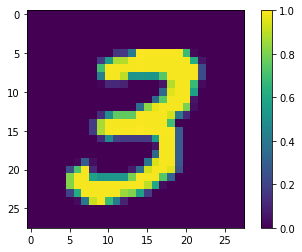

In [9]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

### 1.2 Downscale the images

An image size of 28x28 is much too large for current quantum computers. Resize the image down to 4x4:

In [10]:
x_train_small = tf.image.resize(x_train, (4,4)).numpy()
x_test_small = tf.image.resize(x_test, (4,4)).numpy()

Again, display the first training example—after resize: 

True


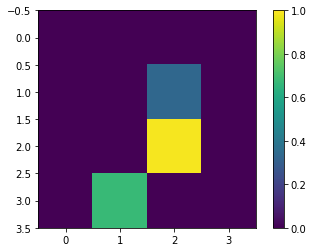

In [11]:
print(y_train[0])

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()

### 1.3 Remove contradictory examples

From section *3.3 Learning to Distinguish Digits* of <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a>, filter the dataset to remove images that are labeled as belonging to both classes.

This is not a standard machine-learning procedure, but is included in the interest of following the paper.

In [12]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    orig_x = {}
    # Determine the set of labels for each unique image:
    for x,y in zip(xs,ys):
       orig_x[tuple(x.flatten())] = x
       mapping[tuple(x.flatten())].add(y)
    
    new_x = []
    new_y = []
    for flatten_x in mapping:
      x = orig_x[flatten_x]
      labels = mapping[flatten_x]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(next(iter(labels)))
      else:
          # Throw out images that match more than one label.
          pass
    
    num_uniq_3 = sum(1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_6 = sum(1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 3s: ", num_uniq_3)
    print("Number of unique 6s: ", num_uniq_6)
    print("Number of unique contradicting labels (both 3 and 6): ", num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))
    
    return np.array(new_x), np.array(new_y)

The resulting counts do not closely match the reported values, but the exact procedure is not specified.

It is also worth noting here that applying filtering contradictory examples at this point does not totally prevent the model from receiving contradictory training examples: the next step binarizes the data which will cause more collisions. 

In [13]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 10387
Number of unique 3s:  4912
Number of unique 6s:  5426
Number of unique contradicting labels (both 3 and 6):  49

Initial number of images:  12049
Remaining non-contradicting unique images:  10338


### 1.4 Encode the data as quantum circuits

To process images using a quantum computer, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> proposed representing each pixel with a qubit, with the state depending on the value of the pixel. The first step is to convert to a binary encoding.

In [14]:
THRESHOLD = 0.5

x_train_bin = np.array(x_train_nocon > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

If you were to remove contradictory images at this point you would be left with only 193, likely not enough for effective training.

In [15]:
_ = remove_contradicting(x_train_bin, y_train_nocon)

Number of unique images: 193
Number of unique 3s:  80
Number of unique 6s:  69
Number of unique contradicting labels (both 3 and 6):  44

Initial number of images:  10338
Remaining non-contradicting unique images:  149


The qubits at pixel indices with values that exceed a threshold, are rotated through an $X$ gate.

In [16]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

Here is the circuit created for the first example (circuit diagrams do not show qubits with zero gates):

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


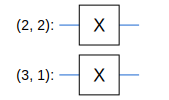

In [17]:
SVGCircuit(x_train_circ[0])

Compare this circuit to the indices where the image value exceeds the threshold:

In [18]:
bin_img = x_train_bin[0,:,:,0]
indices = np.array(np.where(bin_img)).T
indices

array([[2, 2],
       [3, 1]])

Convert these `Cirq` circuits to tensors for `tfq`:

In [19]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

## 2. Quantum neural network

There is little guidance for a quantum circuit structure that classifies images. Since the classification is based on the expectation of the readout qubit, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> propose using two qubit gates, with the readout qubit always acted upon. This is similar in some ways to running small a <a href="https://arxiv.org/abs/1511.06464" class="external">Unitary RNN</a> across the pixels.

### 2.1 Build the model circuit

This following example shows this layered approach. Each layer uses *n* instances of the same gate, with each of the data qubits acting on the readout qubit.

Start with a simple class that will add a layer of these gates to a circuit:

In [20]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout
    
    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

Build an example circuit layer to see how it looks:

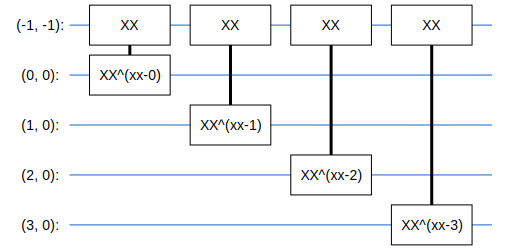

In [21]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

Now build a two-layered model, matching the data-circuit size, and include the preparation and readout operations.

In [22]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()
    
    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))
    
    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [23]:
model_circuit, model_readout = create_quantum_model()

### 2.2 Wrap the model-circuit in a tfq-keras model

Build the Keras model with the quantum components. This model is fed the "quantum data", from `x_train_circ`, that encodes the classical data. It uses a *Parametrized Quantum Circuit* layer, `tfq.layers.PQC`, to train the model circuit, on the quantum data.

To classify these images, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> proposed taking the expectation of a readout qubit in a parameterized circuit. The expectation returns a value between 1 and -1.

In [24]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
])

Next, describe the training procedure to the model, using the `compile` method.

Since the the expected readout is in the range `[-1,1]`, optimizing the hinge loss is a somewhat natural fit. 

Note: Another valid approach would be to shift the output range to `[0,1]`, and treat it as the probability the model assigns to class `3`. This could be used with a standard a `tf.losses.BinaryCrossentropy` loss.

To use the hinge loss here you need to make two small adjustments. First convert the labels, `y_train_nocon`, from boolean to `[-1,1]`, as expected by the hinge loss.

In [25]:
y_train_hinge = 2.0*y_train_nocon-1.0
y_test_hinge = 2.0*y_test-1.0

Second, use a custiom `hinge_accuracy` metric that correctly handles `[-1, 1]` as the `y_true` labels argument. 
`tf.losses.BinaryAccuracy(threshold=0.0)` expects `y_true` to be a boolean, and so can't be used with hinge loss).

In [26]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [27]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


### Train the quantum model

Now train the model—this takes about 45 min. If you don't want to wait that long, use a small subset of the data (set `NUM_EXAMPLES=500`, below). This doesn't really affect the model's progress during training (it only has 32 parameters, and doesn't need much data to constrain these). Using fewer examples just ends training earlier (5min), but runs long enough to show that it is making progress in the validation logs.

In [29]:
EPOCHS = 3
BATCH_SIZE = 32

NUM_EXAMPLES = len(x_train_tfcirc)

In [30]:
x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

Training this model to convergence should achieve >85% accuracy on the test set.

In [31]:
qnn_history = model.fit(
      x_train_tfcirc_sub, y_train_hinge_sub,
      batch_size=32,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_tfcirc, y_test_hinge))

qnn_results = model.evaluate(x_test_tfcirc, y_test)

Epoch 1/3


  1/324 [..............................] - ETA: 5:05 - loss: 0.9983 - hinge_accuracy: 0.5625

  2/324 [..............................] - ETA: 1:00 - loss: 1.0001 - hinge_accuracy: 0.4688

  3/324 [..............................] - ETA: 1:00 - loss: 1.0007 - hinge_accuracy: 0.4375

  4/324 [..............................] - ETA: 1:01 - loss: 1.0005 - hinge_accuracy: 0.4609

  5/324 [..............................] - ETA: 1:00 - loss: 1.0000 - hinge_accuracy: 0.4812

  6/324 [..............................] - ETA: 1:00 - loss: 1.0002 - hinge_accuracy: 0.4635

  7/324 [..............................] - ETA: 1:00 - loss: 1.0007 - hinge_accuracy: 0.4375

  8/324 [..............................] - ETA: 1:00 - loss: 1.0004 - hinge_accuracy: 0.4453

  9/324 [..............................] - ETA: 59s - loss: 1.0003 - hinge_accuracy: 0.4479 

 10/324 [..............................] - ETA: 59s - loss: 1.0004 - hinge_accuracy: 0.4469

 11/324 [>.............................] - ETA: 59s - loss: 1.0004 - hinge_accuracy: 0.4574

 12/324 [>.............................] - ETA: 59s - loss: 1.0004 - hinge_accuracy: 0.4609

 13/324 [>.............................] - ETA: 59s - loss: 1.0003 - hinge_accuracy: 0.4736

 14/324 [>.............................] - ETA: 58s - loss: 1.0004 - hinge_accuracy: 0.4732

 15/324 [>.............................] - ETA: 58s - loss: 1.0001 - hinge_accuracy: 0.4854

 16/324 [>.............................] - ETA: 58s - loss: 1.0000 - hinge_accuracy: 0.4961

 17/324 [>.............................] - ETA: 58s - loss: 0.9999 - hinge_accuracy: 0.5037

 18/324 [>.............................] - ETA: 58s - loss: 0.9999 - hinge_accuracy: 0.5052

 19/324 [>.............................] - ETA: 58s - loss: 0.9999 - hinge_accuracy: 0.5066

 20/324 [>.............................] - ETA: 57s - loss: 0.9999 - hinge_accuracy: 0.5109

 21/324 [>.............................] - ETA: 57s - loss: 0.9998 - hinge_accuracy: 0.5134

 22/324 [=>............................] - ETA: 57s - loss: 1.0000 - hinge_accuracy: 0.5071

 23/324 [=>............................] - ETA: 57s - loss: 0.9998 - hinge_accuracy: 0.5122

 24/324 [=>............................] - ETA: 57s - loss: 0.9999 - hinge_accuracy: 0.5091

 25/324 [=>............................] - ETA: 56s - loss: 0.9999 - hinge_accuracy: 0.5063

 26/324 [=>............................] - ETA: 56s - loss: 0.9999 - hinge_accuracy: 0.5096

 27/324 [=>............................] - ETA: 56s - loss: 0.9997 - hinge_accuracy: 0.5127

 28/324 [=>............................] - ETA: 56s - loss: 0.9998 - hinge_accuracy: 0.5123

 29/324 [=>............................] - ETA: 55s - loss: 0.9997 - hinge_accuracy: 0.5140

 30/324 [=>............................] - ETA: 55s - loss: 0.9996 - hinge_accuracy: 0.5177

 31/324 [=>............................] - ETA: 55s - loss: 0.9996 - hinge_accuracy: 0.5161

 32/324 [=>............................] - ETA: 55s - loss: 0.9995 - hinge_accuracy: 0.5215

 33/324 [==>...........................] - ETA: 55s - loss: 0.9994 - hinge_accuracy: 0.5227

 34/324 [==>...........................] - ETA: 54s - loss: 0.9993 - hinge_accuracy: 0.5230

 35/324 [==>...........................] - ETA: 54s - loss: 0.9993 - hinge_accuracy: 0.5214

 36/324 [==>...........................] - ETA: 54s - loss: 0.9994 - hinge_accuracy: 0.5200

 37/324 [==>...........................] - ETA: 54s - loss: 0.9993 - hinge_accuracy: 0.5186

 38/324 [==>...........................] - ETA: 54s - loss: 0.9993 - hinge_accuracy: 0.5173

 39/324 [==>...........................] - ETA: 53s - loss: 0.9992 - hinge_accuracy: 0.5192

 40/324 [==>...........................] - ETA: 53s - loss: 0.9991 - hinge_accuracy: 0.5227

 41/324 [==>...........................] - ETA: 53s - loss: 0.9990 - hinge_accuracy: 0.5229

 42/324 [==>...........................] - ETA: 53s - loss: 0.9990 - hinge_accuracy: 0.5208

 43/324 [==>...........................] - ETA: 53s - loss: 0.9990 - hinge_accuracy: 0.5203

 44/324 [===>..........................] - ETA: 53s - loss: 0.9990 - hinge_accuracy: 0.5192

 45/324 [===>..........................] - ETA: 52s - loss: 0.9989 - hinge_accuracy: 0.5194

 46/324 [===>..........................] - ETA: 52s - loss: 0.9989 - hinge_accuracy: 0.5190

 47/324 [===>..........................] - ETA: 52s - loss: 0.9987 - hinge_accuracy: 0.5206

 48/324 [===>..........................] - ETA: 52s - loss: 0.9986 - hinge_accuracy: 0.5228

 49/324 [===>..........................] - ETA: 52s - loss: 0.9985 - hinge_accuracy: 0.5242

 50/324 [===>..........................] - ETA: 51s - loss: 0.9985 - hinge_accuracy: 0.5244

 51/324 [===>..........................] - ETA: 51s - loss: 0.9983 - hinge_accuracy: 0.5251

 52/324 [===>..........................] - ETA: 51s - loss: 0.9982 - hinge_accuracy: 0.5282

 53/324 [===>..........................] - ETA: 51s - loss: 0.9980 - hinge_accuracy: 0.5312

 54/324 [====>.........................] - ETA: 51s - loss: 0.9979 - hinge_accuracy: 0.5336

 55/324 [====>.........................] - ETA: 50s - loss: 0.9976 - hinge_accuracy: 0.5381

 56/324 [====>.........................] - ETA: 50s - loss: 0.9974 - hinge_accuracy: 0.5402

 57/324 [====>.........................] - ETA: 50s - loss: 0.9972 - hinge_accuracy: 0.5433

 58/324 [====>.........................] - ETA: 50s - loss: 0.9971 - hinge_accuracy: 0.5453

 59/324 [====>.........................] - ETA: 50s - loss: 0.9969 - hinge_accuracy: 0.5471

 60/324 [====>.........................] - ETA: 50s - loss: 0.9966 - hinge_accuracy: 0.5500

 61/324 [====>.........................] - ETA: 49s - loss: 0.9964 - hinge_accuracy: 0.5517

 62/324 [====>.........................] - ETA: 49s - loss: 0.9963 - hinge_accuracy: 0.5519

 63/324 [====>.........................] - ETA: 49s - loss: 0.9961 - hinge_accuracy: 0.5531

 64/324 [====>.........................] - ETA: 49s - loss: 0.9962 - hinge_accuracy: 0.5503

 65/324 [=====>........................] - ETA: 49s - loss: 0.9959 - hinge_accuracy: 0.5519

 66/324 [=====>........................] - ETA: 49s - loss: 0.9958 - hinge_accuracy: 0.5521

 67/324 [=====>........................] - ETA: 49s - loss: 0.9958 - hinge_accuracy: 0.5508

 68/324 [=====>........................] - ETA: 49s - loss: 0.9958 - hinge_accuracy: 0.5501

 69/324 [=====>........................] - ETA: 48s - loss: 0.9955 - hinge_accuracy: 0.5516

 70/324 [=====>........................] - ETA: 48s - loss: 0.9953 - hinge_accuracy: 0.5531

 71/324 [=====>........................] - ETA: 48s - loss: 0.9949 - hinge_accuracy: 0.5550

 72/324 [=====>........................] - ETA: 48s - loss: 0.9945 - hinge_accuracy: 0.5564

 73/324 [=====>........................] - ETA: 48s - loss: 0.9942 - hinge_accuracy: 0.5582

 74/324 [=====>........................] - ETA: 48s - loss: 0.9938 - hinge_accuracy: 0.5604

 75/324 [=====>........................] - ETA: 47s - loss: 0.9936 - hinge_accuracy: 0.5604

 76/324 [======>.......................] - ETA: 47s - loss: 0.9932 - hinge_accuracy: 0.5621

 77/324 [======>.......................] - ETA: 47s - loss: 0.9930 - hinge_accuracy: 0.5625

 78/324 [======>.......................] - ETA: 47s - loss: 0.9927 - hinge_accuracy: 0.5629

 79/324 [======>.......................] - ETA: 47s - loss: 0.9922 - hinge_accuracy: 0.5645

 80/324 [======>.......................] - ETA: 46s - loss: 0.9917 - hinge_accuracy: 0.5664

 81/324 [======>.......................] - ETA: 46s - loss: 0.9916 - hinge_accuracy: 0.5664

 82/324 [======>.......................] - ETA: 46s - loss: 0.9914 - hinge_accuracy: 0.5675

 83/324 [======>.......................] - ETA: 46s - loss: 0.9907 - hinge_accuracy: 0.5708

 84/324 [======>.......................] - ETA: 46s - loss: 0.9905 - hinge_accuracy: 0.5718

 85/324 [======>.......................] - ETA: 45s - loss: 0.9904 - hinge_accuracy: 0.5721

 86/324 [======>.......................] - ETA: 45s - loss: 0.9902 - hinge_accuracy: 0.5734

 87/324 [=======>......................] - ETA: 45s - loss: 0.9897 - hinge_accuracy: 0.5744

 88/324 [=======>......................] - ETA: 45s - loss: 0.9893 - hinge_accuracy: 0.5753

 89/324 [=======>......................] - ETA: 45s - loss: 0.9890 - hinge_accuracy: 0.5765

 90/324 [=======>......................] - ETA: 44s - loss: 0.9888 - hinge_accuracy: 0.5771

 91/324 [=======>......................] - ETA: 44s - loss: 0.9884 - hinge_accuracy: 0.5783

 92/324 [=======>......................] - ETA: 44s - loss: 0.9883 - hinge_accuracy: 0.5778

 93/324 [=======>......................] - ETA: 44s - loss: 0.9877 - hinge_accuracy: 0.5793

 94/324 [=======>......................] - ETA: 44s - loss: 0.9872 - hinge_accuracy: 0.5801

 95/324 [=======>......................] - ETA: 43s - loss: 0.9868 - hinge_accuracy: 0.5819

 96/324 [=======>......................] - ETA: 43s - loss: 0.9859 - hinge_accuracy: 0.5837

 97/324 [=======>......................] - ETA: 43s - loss: 0.9857 - hinge_accuracy: 0.5834

 98/324 [========>.....................] - ETA: 43s - loss: 0.9854 - hinge_accuracy: 0.5845

 99/324 [========>.....................] - ETA: 43s - loss: 0.9853 - hinge_accuracy: 0.5843

100/324 [========>.....................] - ETA: 42s - loss: 0.9844 - hinge_accuracy: 0.5872

101/324 [========>.....................] - ETA: 42s - loss: 0.9839 - hinge_accuracy: 0.5885

102/324 [========>.....................] - ETA: 42s - loss: 0.9830 - hinge_accuracy: 0.5913

103/324 [========>.....................] - ETA: 42s - loss: 0.9827 - hinge_accuracy: 0.5916

104/324 [========>.....................] - ETA: 42s - loss: 0.9821 - hinge_accuracy: 0.5934

105/324 [========>.....................] - ETA: 41s - loss: 0.9813 - hinge_accuracy: 0.5949

106/324 [========>.....................] - ETA: 41s - loss: 0.9806 - hinge_accuracy: 0.5958

107/324 [========>.....................] - ETA: 41s - loss: 0.9797 - hinge_accuracy: 0.5970

108/324 [=========>....................] - ETA: 41s - loss: 0.9793 - hinge_accuracy: 0.5969

109/324 [=========>....................] - ETA: 41s - loss: 0.9786 - hinge_accuracy: 0.5975

110/324 [=========>....................] - ETA: 40s - loss: 0.9783 - hinge_accuracy: 0.5969

111/324 [=========>....................] - ETA: 40s - loss: 0.9777 - hinge_accuracy: 0.5977

112/324 [=========>....................] - ETA: 40s - loss: 0.9770 - hinge_accuracy: 0.5985

113/324 [=========>....................] - ETA: 40s - loss: 0.9761 - hinge_accuracy: 0.5996

114/324 [=========>....................] - ETA: 40s - loss: 0.9752 - hinge_accuracy: 0.6012

115/324 [=========>....................] - ETA: 39s - loss: 0.9743 - hinge_accuracy: 0.6022

116/324 [=========>....................] - ETA: 39s - loss: 0.9734 - hinge_accuracy: 0.6026

117/324 [=========>....................] - ETA: 39s - loss: 0.9720 - hinge_accuracy: 0.6047

118/324 [=========>....................] - ETA: 39s - loss: 0.9709 - hinge_accuracy: 0.6059

119/324 [==========>...................] - ETA: 39s - loss: 0.9701 - hinge_accuracy: 0.6071

120/324 [==========>...................] - ETA: 38s - loss: 0.9693 - hinge_accuracy: 0.6073

121/324 [==========>...................] - ETA: 38s - loss: 0.9684 - hinge_accuracy: 0.6080

122/324 [==========>...................] - ETA: 38s - loss: 0.9675 - hinge_accuracy: 0.6086

123/324 [==========>...................] - ETA: 38s - loss: 0.9663 - hinge_accuracy: 0.6103

124/324 [==========>...................] - ETA: 38s - loss: 0.9658 - hinge_accuracy: 0.6106

125/324 [==========>...................] - ETA: 37s - loss: 0.9646 - hinge_accuracy: 0.6125

126/324 [==========>...................] - ETA: 37s - loss: 0.9639 - hinge_accuracy: 0.6131

127/324 [==========>...................] - ETA: 37s - loss: 0.9633 - hinge_accuracy: 0.6142

128/324 [==========>...................] - ETA: 37s - loss: 0.9621 - hinge_accuracy: 0.6157

129/324 [==========>...................] - ETA: 37s - loss: 0.9613 - hinge_accuracy: 0.6168

130/324 [===========>..................] - ETA: 36s - loss: 0.9603 - hinge_accuracy: 0.6180

131/324 [===========>..................] - ETA: 36s - loss: 0.9591 - hinge_accuracy: 0.6195

132/324 [===========>..................] - ETA: 36s - loss: 0.9580 - hinge_accuracy: 0.6207

133/324 [===========>..................] - ETA: 36s - loss: 0.9565 - hinge_accuracy: 0.6224

134/324 [===========>..................] - ETA: 36s - loss: 0.9555 - hinge_accuracy: 0.6234

135/324 [===========>..................] - ETA: 36s - loss: 0.9541 - hinge_accuracy: 0.6243

136/324 [===========>..................] - ETA: 35s - loss: 0.9533 - hinge_accuracy: 0.6245

137/324 [===========>..................] - ETA: 35s - loss: 0.9524 - hinge_accuracy: 0.6257

138/324 [===========>..................] - ETA: 35s - loss: 0.9513 - hinge_accuracy: 0.6264

139/324 [===========>..................] - ETA: 35s - loss: 0.9501 - hinge_accuracy: 0.6270

140/324 [===========>..................] - ETA: 35s - loss: 0.9491 - hinge_accuracy: 0.6281

141/324 [============>.................] - ETA: 34s - loss: 0.9478 - hinge_accuracy: 0.6290

142/324 [============>.................] - ETA: 34s - loss: 0.9466 - hinge_accuracy: 0.6301

143/324 [============>.................] - ETA: 34s - loss: 0.9453 - hinge_accuracy: 0.6307

144/324 [============>.................] - ETA: 34s - loss: 0.9445 - hinge_accuracy: 0.6311

145/324 [============>.................] - ETA: 34s - loss: 0.9429 - hinge_accuracy: 0.6325

146/324 [============>.................] - ETA: 33s - loss: 0.9411 - hinge_accuracy: 0.6344

147/324 [============>.................] - ETA: 33s - loss: 0.9401 - hinge_accuracy: 0.6350

148/324 [============>.................] - ETA: 33s - loss: 0.9383 - hinge_accuracy: 0.6364

149/324 [============>.................] - ETA: 33s - loss: 0.9372 - hinge_accuracy: 0.6372

150/324 [============>.................] - ETA: 33s - loss: 0.9359 - hinge_accuracy: 0.6381

151/324 [============>.................] - ETA: 32s - loss: 0.9343 - hinge_accuracy: 0.6395

152/324 [=============>................] - ETA: 32s - loss: 0.9332 - hinge_accuracy: 0.6402

153/324 [=============>................] - ETA: 32s - loss: 0.9320 - hinge_accuracy: 0.6409

154/324 [=============>................] - ETA: 32s - loss: 0.9304 - hinge_accuracy: 0.6422

155/324 [=============>................] - ETA: 32s - loss: 0.9287 - hinge_accuracy: 0.6431

156/324 [=============>................] - ETA: 32s - loss: 0.9280 - hinge_accuracy: 0.6436

157/324 [=============>................] - ETA: 31s - loss: 0.9266 - hinge_accuracy: 0.6447

158/324 [=============>................] - ETA: 31s - loss: 0.9254 - hinge_accuracy: 0.6458

159/324 [=============>................] - ETA: 31s - loss: 0.9240 - hinge_accuracy: 0.6466

160/324 [=============>................] - ETA: 31s - loss: 0.9229 - hinge_accuracy: 0.6473

161/324 [=============>................] - ETA: 31s - loss: 0.9223 - hinge_accuracy: 0.6475

162/324 [==============>...............] - ETA: 30s - loss: 0.9203 - hinge_accuracy: 0.6489

163/324 [==============>...............] - ETA: 30s - loss: 0.9185 - hinge_accuracy: 0.6505

164/324 [==============>...............] - ETA: 30s - loss: 0.9171 - hinge_accuracy: 0.6511

165/324 [==============>...............] - ETA: 30s - loss: 0.9156 - hinge_accuracy: 0.6521

166/324 [==============>...............] - ETA: 30s - loss: 0.9140 - hinge_accuracy: 0.6532

167/324 [==============>...............] - ETA: 29s - loss: 0.9129 - hinge_accuracy: 0.6538

168/324 [==============>...............] - ETA: 29s - loss: 0.9117 - hinge_accuracy: 0.6542

169/324 [==============>...............] - ETA: 29s - loss: 0.9094 - hinge_accuracy: 0.6557

170/324 [==============>...............] - ETA: 29s - loss: 0.9077 - hinge_accuracy: 0.6568

171/324 [==============>...............] - ETA: 29s - loss: 0.9063 - hinge_accuracy: 0.6577

172/324 [==============>...............] - ETA: 29s - loss: 0.9052 - hinge_accuracy: 0.6584

173/324 [===============>..............] - ETA: 28s - loss: 0.9039 - hinge_accuracy: 0.6590

174/324 [===============>..............] - ETA: 28s - loss: 0.9025 - hinge_accuracy: 0.6595

175/324 [===============>..............] - ETA: 28s - loss: 0.9017 - hinge_accuracy: 0.6598

176/324 [===============>..............] - ETA: 28s - loss: 0.9003 - hinge_accuracy: 0.6602

177/324 [===============>..............] - ETA: 28s - loss: 0.8989 - hinge_accuracy: 0.6610

178/324 [===============>..............] - ETA: 27s - loss: 0.8966 - hinge_accuracy: 0.6622

179/324 [===============>..............] - ETA: 27s - loss: 0.8949 - hinge_accuracy: 0.6629

180/324 [===============>..............] - ETA: 27s - loss: 0.8934 - hinge_accuracy: 0.6634

181/324 [===============>..............] - ETA: 27s - loss: 0.8918 - hinge_accuracy: 0.6644

182/324 [===============>..............] - ETA: 27s - loss: 0.8907 - hinge_accuracy: 0.6648

183/324 [===============>..............] - ETA: 26s - loss: 0.8887 - hinge_accuracy: 0.6658

184/324 [================>.............] - ETA: 26s - loss: 0.8871 - hinge_accuracy: 0.6666

185/324 [================>.............] - ETA: 26s - loss: 0.8858 - hinge_accuracy: 0.6669

186/324 [================>.............] - ETA: 26s - loss: 0.8844 - hinge_accuracy: 0.6677

187/324 [================>.............] - ETA: 26s - loss: 0.8825 - hinge_accuracy: 0.6686

188/324 [================>.............] - ETA: 25s - loss: 0.8806 - hinge_accuracy: 0.6695

189/324 [================>.............] - ETA: 25s - loss: 0.8791 - hinge_accuracy: 0.6705

190/324 [================>.............] - ETA: 25s - loss: 0.8781 - hinge_accuracy: 0.6707

191/324 [================>.............] - ETA: 25s - loss: 0.8766 - hinge_accuracy: 0.6711

192/324 [================>.............] - ETA: 25s - loss: 0.8754 - hinge_accuracy: 0.6715

193/324 [================>.............] - ETA: 24s - loss: 0.8742 - hinge_accuracy: 0.6720

194/324 [================>.............] - ETA: 24s - loss: 0.8723 - hinge_accuracy: 0.6732

195/324 [=================>............] - ETA: 24s - loss: 0.8712 - hinge_accuracy: 0.6736

196/324 [=================>............] - ETA: 24s - loss: 0.8697 - hinge_accuracy: 0.6744

197/324 [=================>............] - ETA: 24s - loss: 0.8682 - hinge_accuracy: 0.6751

198/324 [=================>............] - ETA: 24s - loss: 0.8667 - hinge_accuracy: 0.6758

199/324 [=================>............] - ETA: 23s - loss: 0.8654 - hinge_accuracy: 0.6768

200/324 [=================>............] - ETA: 23s - loss: 0.8637 - hinge_accuracy: 0.6777

201/324 [=================>............] - ETA: 23s - loss: 0.8628 - hinge_accuracy: 0.6782

202/324 [=================>............] - ETA: 23s - loss: 0.8612 - hinge_accuracy: 0.6791

203/324 [=================>............] - ETA: 23s - loss: 0.8596 - hinge_accuracy: 0.6798

204/324 [=================>............] - ETA: 22s - loss: 0.8573 - hinge_accuracy: 0.6812

205/324 [=================>............] - ETA: 22s - loss: 0.8558 - hinge_accuracy: 0.6822

206/324 [==================>...........] - ETA: 22s - loss: 0.8545 - hinge_accuracy: 0.6829

207/324 [==================>...........] - ETA: 22s - loss: 0.8528 - hinge_accuracy: 0.6839

208/324 [==================>...........] - ETA: 22s - loss: 0.8510 - hinge_accuracy: 0.6848

209/324 [==================>...........] - ETA: 21s - loss: 0.8495 - hinge_accuracy: 0.6856

210/324 [==================>...........] - ETA: 21s - loss: 0.8480 - hinge_accuracy: 0.6863

211/324 [==================>...........] - ETA: 21s - loss: 0.8463 - hinge_accuracy: 0.6872

212/324 [==================>...........] - ETA: 21s - loss: 0.8447 - hinge_accuracy: 0.6878

213/324 [==================>...........] - ETA: 21s - loss: 0.8432 - hinge_accuracy: 0.6887

214/324 [==================>...........] - ETA: 20s - loss: 0.8412 - hinge_accuracy: 0.6895

215/324 [==================>...........] - ETA: 20s - loss: 0.8393 - hinge_accuracy: 0.6908

216/324 [===================>..........] - ETA: 20s - loss: 0.8376 - hinge_accuracy: 0.6918

217/324 [===================>..........] - ETA: 20s - loss: 0.8364 - hinge_accuracy: 0.6925

218/324 [===================>..........] - ETA: 20s - loss: 0.8349 - hinge_accuracy: 0.6935

219/324 [===================>..........] - ETA: 20s - loss: 0.8341 - hinge_accuracy: 0.6939

220/324 [===================>..........] - ETA: 19s - loss: 0.8319 - hinge_accuracy: 0.6949

221/324 [===================>..........] - ETA: 19s - loss: 0.8306 - hinge_accuracy: 0.6956

222/324 [===================>..........] - ETA: 19s - loss: 0.8293 - hinge_accuracy: 0.6961

223/324 [===================>..........] - ETA: 19s - loss: 0.8280 - hinge_accuracy: 0.6967

224/324 [===================>..........] - ETA: 19s - loss: 0.8268 - hinge_accuracy: 0.6973

225/324 [===================>..........] - ETA: 18s - loss: 0.8252 - hinge_accuracy: 0.6982

226/324 [===================>..........] - ETA: 18s - loss: 0.8244 - hinge_accuracy: 0.6986

227/324 [====================>.........] - ETA: 18s - loss: 0.8231 - hinge_accuracy: 0.6992

228/324 [====================>.........] - ETA: 18s - loss: 0.8215 - hinge_accuracy: 0.7001

229/324 [====================>.........] - ETA: 18s - loss: 0.8200 - hinge_accuracy: 0.7009

230/324 [====================>.........] - ETA: 17s - loss: 0.8186 - hinge_accuracy: 0.7016

231/324 [====================>.........] - ETA: 17s - loss: 0.8163 - hinge_accuracy: 0.7027

232/324 [====================>.........] - ETA: 17s - loss: 0.8148 - hinge_accuracy: 0.7034

233/324 [====================>.........] - ETA: 17s - loss: 0.8135 - hinge_accuracy: 0.7037

234/324 [====================>.........] - ETA: 17s - loss: 0.8125 - hinge_accuracy: 0.7042

235/324 [====================>.........] - ETA: 16s - loss: 0.8111 - hinge_accuracy: 0.7047

236/324 [====================>.........] - ETA: 16s - loss: 0.8104 - hinge_accuracy: 0.7047

237/324 [====================>.........] - ETA: 16s - loss: 0.8086 - hinge_accuracy: 0.7054

238/324 [=====================>........] - ETA: 16s - loss: 0.8077 - hinge_accuracy: 0.7059

239/324 [=====================>........] - ETA: 16s - loss: 0.8066 - hinge_accuracy: 0.7066

240/324 [=====================>........] - ETA: 15s - loss: 0.8049 - hinge_accuracy: 0.7073

241/324 [=====================>........] - ETA: 15s - loss: 0.8036 - hinge_accuracy: 0.7077

242/324 [=====================>........] - ETA: 15s - loss: 0.8024 - hinge_accuracy: 0.7080

243/324 [=====================>........] - ETA: 15s - loss: 0.8013 - hinge_accuracy: 0.7086

244/324 [=====================>........] - ETA: 15s - loss: 0.7996 - hinge_accuracy: 0.7097

245/324 [=====================>........] - ETA: 15s - loss: 0.7981 - hinge_accuracy: 0.7103

246/324 [=====================>........] - ETA: 14s - loss: 0.7969 - hinge_accuracy: 0.7110

247/324 [=====================>........] - ETA: 14s - loss: 0.7949 - hinge_accuracy: 0.7119

248/324 [=====================>........] - ETA: 14s - loss: 0.7937 - hinge_accuracy: 0.7122

249/324 [======================>.......] - ETA: 14s - loss: 0.7920 - hinge_accuracy: 0.7131

250/324 [======================>.......] - ETA: 14s - loss: 0.7904 - hinge_accuracy: 0.7139

251/324 [======================>.......] - ETA: 13s - loss: 0.7891 - hinge_accuracy: 0.7143

252/324 [======================>.......] - ETA: 13s - loss: 0.7875 - hinge_accuracy: 0.7149

253/324 [======================>.......] - ETA: 13s - loss: 0.7863 - hinge_accuracy: 0.7154

254/324 [======================>.......] - ETA: 13s - loss: 0.7849 - hinge_accuracy: 0.7159

255/324 [======================>.......] - ETA: 13s - loss: 0.7837 - hinge_accuracy: 0.7164

256/324 [======================>.......] - ETA: 12s - loss: 0.7825 - hinge_accuracy: 0.7168

257/324 [======================>.......] - ETA: 12s - loss: 0.7812 - hinge_accuracy: 0.7174

258/324 [======================>.......] - ETA: 12s - loss: 0.7800 - hinge_accuracy: 0.7181

259/324 [======================>.......] - ETA: 12s - loss: 0.7785 - hinge_accuracy: 0.7190

260/324 [=======================>......] - ETA: 12s - loss: 0.7778 - hinge_accuracy: 0.7192

261/324 [=======================>......] - ETA: 11s - loss: 0.7760 - hinge_accuracy: 0.7201

262/324 [=======================>......] - ETA: 11s - loss: 0.7745 - hinge_accuracy: 0.7209

263/324 [=======================>......] - ETA: 11s - loss: 0.7734 - hinge_accuracy: 0.7211

264/324 [=======================>......] - ETA: 11s - loss: 0.7719 - hinge_accuracy: 0.7217

265/324 [=======================>......] - ETA: 11s - loss: 0.7703 - hinge_accuracy: 0.7224

266/324 [=======================>......] - ETA: 11s - loss: 0.7693 - hinge_accuracy: 0.7230

267/324 [=======================>......] - ETA: 10s - loss: 0.7678 - hinge_accuracy: 0.7235

268/324 [=======================>......] - ETA: 10s - loss: 0.7668 - hinge_accuracy: 0.7240

269/324 [=======================>......] - ETA: 10s - loss: 0.7650 - hinge_accuracy: 0.7249

270/324 [========================>.....] - ETA: 10s - loss: 0.7633 - hinge_accuracy: 0.7258

271/324 [========================>.....] - ETA: 10s - loss: 0.7625 - hinge_accuracy: 0.7259

272/324 [========================>.....] - ETA: 9s - loss: 0.7617 - hinge_accuracy: 0.7262 

273/324 [========================>.....] - ETA: 9s - loss: 0.7603 - hinge_accuracy: 0.7268

274/324 [========================>.....] - ETA: 9s - loss: 0.7589 - hinge_accuracy: 0.7275

275/324 [========================>.....] - ETA: 9s - loss: 0.7581 - hinge_accuracy: 0.7276

276/324 [========================>.....] - ETA: 9s - loss: 0.7566 - hinge_accuracy: 0.7283

277/324 [========================>.....] - ETA: 8s - loss: 0.7549 - hinge_accuracy: 0.7291

278/324 [========================>.....] - ETA: 8s - loss: 0.7540 - hinge_accuracy: 0.7293

279/324 [========================>.....] - ETA: 8s - loss: 0.7527 - hinge_accuracy: 0.7297

280/324 [========================>.....] - ETA: 8s - loss: 0.7513 - hinge_accuracy: 0.7304

281/324 [=========================>....] - ETA: 8s - loss: 0.7504 - hinge_accuracy: 0.7306

282/324 [=========================>....] - ETA: 7s - loss: 0.7497 - hinge_accuracy: 0.7311

283/324 [=========================>....] - ETA: 7s - loss: 0.7493 - hinge_accuracy: 0.7312

284/324 [=========================>....] - ETA: 7s - loss: 0.7484 - hinge_accuracy: 0.7315

285/324 [=========================>....] - ETA: 7s - loss: 0.7474 - hinge_accuracy: 0.7319

286/324 [=========================>....] - ETA: 7s - loss: 0.7465 - hinge_accuracy: 0.7322

287/324 [=========================>....] - ETA: 7s - loss: 0.7448 - hinge_accuracy: 0.7328

288/324 [=========================>....] - ETA: 6s - loss: 0.7442 - hinge_accuracy: 0.7330

289/324 [=========================>....] - ETA: 6s - loss: 0.7434 - hinge_accuracy: 0.7333

290/324 [=========================>....] - ETA: 6s - loss: 0.7423 - hinge_accuracy: 0.7336

291/324 [=========================>....] - ETA: 6s - loss: 0.7424 - hinge_accuracy: 0.7334

292/324 [==========================>...] - ETA: 6s - loss: 0.7410 - hinge_accuracy: 0.7341

293/324 [==========================>...] - ETA: 5s - loss: 0.7401 - hinge_accuracy: 0.7344

294/324 [==========================>...] - ETA: 5s - loss: 0.7388 - hinge_accuracy: 0.7350

295/324 [==========================>...] - ETA: 5s - loss: 0.7379 - hinge_accuracy: 0.7353

296/324 [==========================>...] - ETA: 5s - loss: 0.7369 - hinge_accuracy: 0.7354

297/324 [==========================>...] - ETA: 5s - loss: 0.7356 - hinge_accuracy: 0.7360

298/324 [==========================>...] - ETA: 4s - loss: 0.7342 - hinge_accuracy: 0.7367

299/324 [==========================>...] - ETA: 4s - loss: 0.7331 - hinge_accuracy: 0.7371

300/324 [==========================>...] - ETA: 4s - loss: 0.7324 - hinge_accuracy: 0.7373

301/324 [==========================>...] - ETA: 4s - loss: 0.7316 - hinge_accuracy: 0.7375

302/324 [==========================>...] - ETA: 4s - loss: 0.7302 - hinge_accuracy: 0.7381

303/324 [===========================>..] - ETA: 3s - loss: 0.7291 - hinge_accuracy: 0.7387

304/324 [===========================>..] - ETA: 3s - loss: 0.7276 - hinge_accuracy: 0.7393

305/324 [===========================>..] - ETA: 3s - loss: 0.7267 - hinge_accuracy: 0.7397

306/324 [===========================>..] - ETA: 3s - loss: 0.7255 - hinge_accuracy: 0.7403

307/324 [===========================>..] - ETA: 3s - loss: 0.7243 - hinge_accuracy: 0.7407

308/324 [===========================>..] - ETA: 3s - loss: 0.7232 - hinge_accuracy: 0.7413

309/324 [===========================>..] - ETA: 2s - loss: 0.7222 - hinge_accuracy: 0.7418

310/324 [===========================>..] - ETA: 2s - loss: 0.7216 - hinge_accuracy: 0.7420

311/324 [===========================>..] - ETA: 2s - loss: 0.7205 - hinge_accuracy: 0.7423

312/324 [===========================>..] - ETA: 2s - loss: 0.7194 - hinge_accuracy: 0.7429

313/324 [===========================>..] - ETA: 2s - loss: 0.7186 - hinge_accuracy: 0.7432

314/324 [============================>.] - ETA: 1s - loss: 0.7174 - hinge_accuracy: 0.7437

315/324 [============================>.] - ETA: 1s - loss: 0.7164 - hinge_accuracy: 0.7440

316/324 [============================>.] - ETA: 1s - loss: 0.7155 - hinge_accuracy: 0.7444

317/324 [============================>.] - ETA: 1s - loss: 0.7143 - hinge_accuracy: 0.7448

318/324 [============================>.] - ETA: 1s - loss: 0.7129 - hinge_accuracy: 0.7454

319/324 [============================>.] - ETA: 0s - loss: 0.7117 - hinge_accuracy: 0.7460

320/324 [============================>.] - ETA: 0s - loss: 0.7105 - hinge_accuracy: 0.7464

321/324 [============================>.] - ETA: 0s - loss: 0.7098 - hinge_accuracy: 0.7464

322/324 [============================>.] - ETA: 0s - loss: 0.7086 - hinge_accuracy: 0.7468

323/324 [============================>.] - ETA: 0s - loss: 0.7079 - hinge_accuracy: 0.7470

324/324 [==============================] - ETA: 0s - loss: 0.7078 - hinge_accuracy: 0.7478

324/324 [==============================] - 65s 198ms/step - loss: 0.7078 - hinge_accuracy: 0.7478 - val_loss: 0.3656 - val_hinge_accuracy: 0.8639


Epoch 2/3
  1/324 [..............................] - ETA: 59s - loss: 0.2804 - hinge_accuracy: 0.9062

  2/324 [..............................] - ETA: 1:00 - loss: 0.3833 - hinge_accuracy: 0.8438

  3/324 [..............................] - ETA: 1:00 - loss: 0.4448 - hinge_accuracy: 0.8229

  4/324 [..............................] - ETA: 1:00 - loss: 0.4698 - hinge_accuracy: 0.8047

  5/324 [..............................] - ETA: 1:00 - loss: 0.4738 - hinge_accuracy: 0.8125

  6/324 [..............................] - ETA: 59s - loss: 0.4531 - hinge_accuracy: 0.8281 

  7/324 [..............................] - ETA: 59s - loss: 0.4455 - hinge_accuracy: 0.8348

  8/324 [..............................] - ETA: 59s - loss: 0.4353 - hinge_accuracy: 0.8398

  9/324 [..............................] - ETA: 59s - loss: 0.4487 - hinge_accuracy: 0.8368

 10/324 [..............................] - ETA: 58s - loss: 0.4466 - hinge_accuracy: 0.8438

 11/324 [>.............................] - ETA: 58s - loss: 0.4484 - hinge_accuracy: 0.8438

 12/324 [>.............................] - ETA: 58s - loss: 0.4428 - hinge_accuracy: 0.8464

 13/324 [>.............................] - ETA: 58s - loss: 0.4352 - hinge_accuracy: 0.8510

 14/324 [>.............................] - ETA: 58s - loss: 0.4306 - hinge_accuracy: 0.8527

 15/324 [>.............................] - ETA: 57s - loss: 0.4317 - hinge_accuracy: 0.8500

 16/324 [>.............................] - ETA: 57s - loss: 0.4249 - hinge_accuracy: 0.8574

 17/324 [>.............................] - ETA: 57s - loss: 0.4227 - hinge_accuracy: 0.8585

 18/324 [>.............................] - ETA: 57s - loss: 0.4221 - hinge_accuracy: 0.8594

 19/324 [>.............................] - ETA: 57s - loss: 0.4202 - hinge_accuracy: 0.8602

 20/324 [>.............................] - ETA: 57s - loss: 0.4106 - hinge_accuracy: 0.8625

 21/324 [>.............................] - ETA: 56s - loss: 0.4113 - hinge_accuracy: 0.8616

 22/324 [=>............................] - ETA: 56s - loss: 0.4111 - hinge_accuracy: 0.8608

 23/324 [=>............................] - ETA: 56s - loss: 0.4187 - hinge_accuracy: 0.8560

 24/324 [=>............................] - ETA: 56s - loss: 0.4200 - hinge_accuracy: 0.8555

 25/324 [=>............................] - ETA: 56s - loss: 0.4132 - hinge_accuracy: 0.8587

 26/324 [=>............................] - ETA: 55s - loss: 0.4119 - hinge_accuracy: 0.8594

 27/324 [=>............................] - ETA: 55s - loss: 0.4098 - hinge_accuracy: 0.8600

 28/324 [=>............................] - ETA: 55s - loss: 0.4146 - hinge_accuracy: 0.8583

 29/324 [=>............................] - ETA: 55s - loss: 0.4145 - hinge_accuracy: 0.8567

 30/324 [=>............................] - ETA: 55s - loss: 0.4139 - hinge_accuracy: 0.8552

 31/324 [=>............................] - ETA: 55s - loss: 0.4137 - hinge_accuracy: 0.8558

 32/324 [=>............................] - ETA: 54s - loss: 0.4130 - hinge_accuracy: 0.8555

 33/324 [==>...........................] - ETA: 54s - loss: 0.4168 - hinge_accuracy: 0.8513

 34/324 [==>...........................] - ETA: 54s - loss: 0.4203 - hinge_accuracy: 0.8493

 35/324 [==>...........................] - ETA: 54s - loss: 0.4206 - hinge_accuracy: 0.8491

 36/324 [==>...........................] - ETA: 54s - loss: 0.4162 - hinge_accuracy: 0.8507

 37/324 [==>...........................] - ETA: 53s - loss: 0.4147 - hinge_accuracy: 0.8522

 38/324 [==>...........................] - ETA: 53s - loss: 0.4132 - hinge_accuracy: 0.8528

 39/324 [==>...........................] - ETA: 53s - loss: 0.4150 - hinge_accuracy: 0.8510

 40/324 [==>...........................] - ETA: 53s - loss: 0.4129 - hinge_accuracy: 0.8508

 41/324 [==>...........................] - ETA: 53s - loss: 0.4131 - hinge_accuracy: 0.8491

 42/324 [==>...........................] - ETA: 52s - loss: 0.4132 - hinge_accuracy: 0.8482

 43/324 [==>...........................] - ETA: 52s - loss: 0.4140 - hinge_accuracy: 0.8481

 44/324 [===>..........................] - ETA: 52s - loss: 0.4144 - hinge_accuracy: 0.8473

 45/324 [===>..........................] - ETA: 52s - loss: 0.4118 - hinge_accuracy: 0.8486

 46/324 [===>..........................] - ETA: 52s - loss: 0.4106 - hinge_accuracy: 0.8499

 47/324 [===>..........................] - ETA: 52s - loss: 0.4110 - hinge_accuracy: 0.8497

 48/324 [===>..........................] - ETA: 51s - loss: 0.4104 - hinge_accuracy: 0.8496

 49/324 [===>..........................] - ETA: 51s - loss: 0.4092 - hinge_accuracy: 0.8520

 50/324 [===>..........................] - ETA: 51s - loss: 0.4106 - hinge_accuracy: 0.8519

 51/324 [===>..........................] - ETA: 51s - loss: 0.4101 - hinge_accuracy: 0.8511

 52/324 [===>..........................] - ETA: 51s - loss: 0.4093 - hinge_accuracy: 0.8516

 53/324 [===>..........................] - ETA: 50s - loss: 0.4095 - hinge_accuracy: 0.8514

 54/324 [====>.........................] - ETA: 50s - loss: 0.4086 - hinge_accuracy: 0.8519

 55/324 [====>.........................] - ETA: 50s - loss: 0.4061 - hinge_accuracy: 0.8534

 56/324 [====>.........................] - ETA: 50s - loss: 0.4050 - hinge_accuracy: 0.8544

 57/324 [====>.........................] - ETA: 50s - loss: 0.4030 - hinge_accuracy: 0.8558

 58/324 [====>.........................] - ETA: 50s - loss: 0.4036 - hinge_accuracy: 0.8545

 59/324 [====>.........................] - ETA: 49s - loss: 0.4007 - hinge_accuracy: 0.8559

 60/324 [====>.........................] - ETA: 49s - loss: 0.3986 - hinge_accuracy: 0.8573

 61/324 [====>.........................] - ETA: 49s - loss: 0.3987 - hinge_accuracy: 0.8566

 62/324 [====>.........................] - ETA: 49s - loss: 0.3967 - hinge_accuracy: 0.8579

 63/324 [====>.........................] - ETA: 49s - loss: 0.3963 - hinge_accuracy: 0.8576

 64/324 [====>.........................] - ETA: 48s - loss: 0.3963 - hinge_accuracy: 0.8574

 65/324 [=====>........................] - ETA: 48s - loss: 0.3956 - hinge_accuracy: 0.8577

 66/324 [=====>........................] - ETA: 48s - loss: 0.3966 - hinge_accuracy: 0.8570

 67/324 [=====>........................] - ETA: 48s - loss: 0.3959 - hinge_accuracy: 0.8573

 68/324 [=====>........................] - ETA: 48s - loss: 0.3944 - hinge_accuracy: 0.8580

 69/324 [=====>........................] - ETA: 47s - loss: 0.3941 - hinge_accuracy: 0.8587

 70/324 [=====>........................] - ETA: 47s - loss: 0.3921 - hinge_accuracy: 0.8598

 71/324 [=====>........................] - ETA: 47s - loss: 0.3947 - hinge_accuracy: 0.8578

 72/324 [=====>........................] - ETA: 47s - loss: 0.3937 - hinge_accuracy: 0.8585

 73/324 [=====>........................] - ETA: 47s - loss: 0.3948 - hinge_accuracy: 0.8579

 74/324 [=====>........................] - ETA: 47s - loss: 0.3942 - hinge_accuracy: 0.8581

 75/324 [=====>........................] - ETA: 46s - loss: 0.3944 - hinge_accuracy: 0.8587

 76/324 [======>.......................] - ETA: 46s - loss: 0.3939 - hinge_accuracy: 0.8594

 77/324 [======>.......................] - ETA: 46s - loss: 0.3927 - hinge_accuracy: 0.8600

 78/324 [======>.......................] - ETA: 46s - loss: 0.3916 - hinge_accuracy: 0.8598

 79/324 [======>.......................] - ETA: 46s - loss: 0.3925 - hinge_accuracy: 0.8592

 80/324 [======>.......................] - ETA: 45s - loss: 0.3911 - hinge_accuracy: 0.8602

 81/324 [======>.......................] - ETA: 45s - loss: 0.3924 - hinge_accuracy: 0.8596

 82/324 [======>.......................] - ETA: 45s - loss: 0.3937 - hinge_accuracy: 0.8586

 83/324 [======>.......................] - ETA: 45s - loss: 0.3939 - hinge_accuracy: 0.8584

 84/324 [======>.......................] - ETA: 45s - loss: 0.3922 - hinge_accuracy: 0.8594

 85/324 [======>.......................] - ETA: 44s - loss: 0.3941 - hinge_accuracy: 0.8585

 86/324 [======>.......................] - ETA: 44s - loss: 0.3945 - hinge_accuracy: 0.8579

 87/324 [=======>......................] - ETA: 44s - loss: 0.3943 - hinge_accuracy: 0.8581

 88/324 [=======>......................] - ETA: 44s - loss: 0.3931 - hinge_accuracy: 0.8583

 89/324 [=======>......................] - ETA: 44s - loss: 0.3942 - hinge_accuracy: 0.8574

 90/324 [=======>......................] - ETA: 44s - loss: 0.3951 - hinge_accuracy: 0.8576

 91/324 [=======>......................] - ETA: 43s - loss: 0.3956 - hinge_accuracy: 0.8578

 92/324 [=======>......................] - ETA: 43s - loss: 0.3944 - hinge_accuracy: 0.8580

 93/324 [=======>......................] - ETA: 43s - loss: 0.3952 - hinge_accuracy: 0.8579

 94/324 [=======>......................] - ETA: 43s - loss: 0.3949 - hinge_accuracy: 0.8584

 95/324 [=======>......................] - ETA: 43s - loss: 0.3951 - hinge_accuracy: 0.8582

 96/324 [=======>......................] - ETA: 42s - loss: 0.3959 - hinge_accuracy: 0.8577

 97/324 [=======>......................] - ETA: 42s - loss: 0.3957 - hinge_accuracy: 0.8579

 98/324 [========>.....................] - ETA: 42s - loss: 0.3959 - hinge_accuracy: 0.8575

 99/324 [========>.....................] - ETA: 42s - loss: 0.3968 - hinge_accuracy: 0.8567

100/324 [========>.....................] - ETA: 42s - loss: 0.3965 - hinge_accuracy: 0.8569

101/324 [========>.....................] - ETA: 41s - loss: 0.3967 - hinge_accuracy: 0.8571

102/324 [========>.....................] - ETA: 41s - loss: 0.3974 - hinge_accuracy: 0.8563

103/324 [========>.....................] - ETA: 41s - loss: 0.3960 - hinge_accuracy: 0.8571

104/324 [========>.....................] - ETA: 41s - loss: 0.3964 - hinge_accuracy: 0.8570

105/324 [========>.....................] - ETA: 41s - loss: 0.3970 - hinge_accuracy: 0.8565

106/324 [========>.....................] - ETA: 41s - loss: 0.3970 - hinge_accuracy: 0.8567

107/324 [========>.....................] - ETA: 40s - loss: 0.3968 - hinge_accuracy: 0.8569

108/324 [=========>....................] - ETA: 40s - loss: 0.3959 - hinge_accuracy: 0.8576

109/324 [=========>....................] - ETA: 40s - loss: 0.3961 - hinge_accuracy: 0.8575

110/324 [=========>....................] - ETA: 40s - loss: 0.3958 - hinge_accuracy: 0.8577

111/324 [=========>....................] - ETA: 40s - loss: 0.3964 - hinge_accuracy: 0.8575

112/324 [=========>....................] - ETA: 39s - loss: 0.3967 - hinge_accuracy: 0.8569

113/324 [=========>....................] - ETA: 39s - loss: 0.3974 - hinge_accuracy: 0.8565

114/324 [=========>....................] - ETA: 39s - loss: 0.3972 - hinge_accuracy: 0.8566

115/324 [=========>....................] - ETA: 39s - loss: 0.3966 - hinge_accuracy: 0.8571

116/324 [=========>....................] - ETA: 39s - loss: 0.3961 - hinge_accuracy: 0.8575

117/324 [=========>....................] - ETA: 38s - loss: 0.3957 - hinge_accuracy: 0.8576

118/324 [=========>....................] - ETA: 38s - loss: 0.3953 - hinge_accuracy: 0.8583

119/324 [==========>...................] - ETA: 38s - loss: 0.3954 - hinge_accuracy: 0.8585

120/324 [==========>...................] - ETA: 38s - loss: 0.3958 - hinge_accuracy: 0.8583

121/324 [==========>...................] - ETA: 38s - loss: 0.3939 - hinge_accuracy: 0.8592

122/324 [==========>...................] - ETA: 38s - loss: 0.3937 - hinge_accuracy: 0.8596

123/324 [==========>...................] - ETA: 37s - loss: 0.3945 - hinge_accuracy: 0.8587

124/324 [==========>...................] - ETA: 37s - loss: 0.3945 - hinge_accuracy: 0.8584

125/324 [==========>...................] - ETA: 37s - loss: 0.3948 - hinge_accuracy: 0.8580

126/324 [==========>...................] - ETA: 37s - loss: 0.3935 - hinge_accuracy: 0.8586

127/324 [==========>...................] - ETA: 37s - loss: 0.3923 - hinge_accuracy: 0.8593

128/324 [==========>...................] - ETA: 36s - loss: 0.3926 - hinge_accuracy: 0.8589

129/324 [==========>...................] - ETA: 36s - loss: 0.3921 - hinge_accuracy: 0.8593

130/324 [===========>..................] - ETA: 36s - loss: 0.3925 - hinge_accuracy: 0.8584

131/324 [===========>..................] - ETA: 36s - loss: 0.3930 - hinge_accuracy: 0.8581

132/324 [===========>..................] - ETA: 36s - loss: 0.3916 - hinge_accuracy: 0.8589

133/324 [===========>..................] - ETA: 35s - loss: 0.3907 - hinge_accuracy: 0.8595

134/324 [===========>..................] - ETA: 35s - loss: 0.3892 - hinge_accuracy: 0.8601

135/324 [===========>..................] - ETA: 35s - loss: 0.3892 - hinge_accuracy: 0.8600

136/324 [===========>..................] - ETA: 35s - loss: 0.3884 - hinge_accuracy: 0.8603

137/324 [===========>..................] - ETA: 35s - loss: 0.3875 - hinge_accuracy: 0.8606

138/324 [===========>..................] - ETA: 35s - loss: 0.3878 - hinge_accuracy: 0.8603

139/324 [===========>..................] - ETA: 34s - loss: 0.3881 - hinge_accuracy: 0.8604

140/324 [===========>..................] - ETA: 34s - loss: 0.3882 - hinge_accuracy: 0.8600

141/324 [============>.................] - ETA: 34s - loss: 0.3872 - hinge_accuracy: 0.8606

142/324 [============>.................] - ETA: 34s - loss: 0.3862 - hinge_accuracy: 0.8611

143/324 [============>.................] - ETA: 34s - loss: 0.3856 - hinge_accuracy: 0.8617

144/324 [============>.................] - ETA: 33s - loss: 0.3854 - hinge_accuracy: 0.8620

145/324 [============>.................] - ETA: 33s - loss: 0.3857 - hinge_accuracy: 0.8616

146/324 [============>.................] - ETA: 33s - loss: 0.3848 - hinge_accuracy: 0.8619

147/324 [============>.................] - ETA: 33s - loss: 0.3856 - hinge_accuracy: 0.8616

148/324 [============>.................] - ETA: 33s - loss: 0.3854 - hinge_accuracy: 0.8617

149/324 [============>.................] - ETA: 32s - loss: 0.3853 - hinge_accuracy: 0.8616

150/324 [============>.................] - ETA: 32s - loss: 0.3845 - hinge_accuracy: 0.8625

151/324 [============>.................] - ETA: 32s - loss: 0.3843 - hinge_accuracy: 0.8626

152/324 [=============>................] - ETA: 32s - loss: 0.3851 - hinge_accuracy: 0.8623

153/324 [=============>................] - ETA: 32s - loss: 0.3860 - hinge_accuracy: 0.8615

154/324 [=============>................] - ETA: 32s - loss: 0.3857 - hinge_accuracy: 0.8616

155/324 [=============>................] - ETA: 31s - loss: 0.3864 - hinge_accuracy: 0.8611

156/324 [=============>................] - ETA: 31s - loss: 0.3868 - hinge_accuracy: 0.8604

157/324 [=============>................] - ETA: 31s - loss: 0.3865 - hinge_accuracy: 0.8603

158/324 [=============>................] - ETA: 31s - loss: 0.3868 - hinge_accuracy: 0.8602

159/324 [=============>................] - ETA: 31s - loss: 0.3869 - hinge_accuracy: 0.8601

160/324 [=============>................] - ETA: 30s - loss: 0.3878 - hinge_accuracy: 0.8594

161/324 [=============>................] - ETA: 30s - loss: 0.3881 - hinge_accuracy: 0.8591

162/324 [==============>...............] - ETA: 30s - loss: 0.3878 - hinge_accuracy: 0.8598

163/324 [==============>...............] - ETA: 30s - loss: 0.3871 - hinge_accuracy: 0.8600

164/324 [==============>...............] - ETA: 30s - loss: 0.3872 - hinge_accuracy: 0.8599

165/324 [==============>...............] - ETA: 29s - loss: 0.3866 - hinge_accuracy: 0.8602

166/324 [==============>...............] - ETA: 29s - loss: 0.3861 - hinge_accuracy: 0.8603

167/324 [==============>...............] - ETA: 29s - loss: 0.3863 - hinge_accuracy: 0.8600

168/324 [==============>...............] - ETA: 29s - loss: 0.3866 - hinge_accuracy: 0.8599

169/324 [==============>...............] - ETA: 29s - loss: 0.3863 - hinge_accuracy: 0.8604

170/324 [==============>...............] - ETA: 28s - loss: 0.3858 - hinge_accuracy: 0.8608

171/324 [==============>...............] - ETA: 28s - loss: 0.3850 - hinge_accuracy: 0.8611

172/324 [==============>...............] - ETA: 28s - loss: 0.3844 - hinge_accuracy: 0.8616

173/324 [===============>..............] - ETA: 28s - loss: 0.3839 - hinge_accuracy: 0.8616

174/324 [===============>..............] - ETA: 28s - loss: 0.3839 - hinge_accuracy: 0.8614

175/324 [===============>..............] - ETA: 28s - loss: 0.3844 - hinge_accuracy: 0.8609

176/324 [===============>..............] - ETA: 27s - loss: 0.3849 - hinge_accuracy: 0.8604

177/324 [===============>..............] - ETA: 27s - loss: 0.3849 - hinge_accuracy: 0.8607

178/324 [===============>..............] - ETA: 27s - loss: 0.3846 - hinge_accuracy: 0.8606

179/324 [===============>..............] - ETA: 27s - loss: 0.3849 - hinge_accuracy: 0.8603

180/324 [===============>..............] - ETA: 27s - loss: 0.3843 - hinge_accuracy: 0.8606

181/324 [===============>..............] - ETA: 26s - loss: 0.3843 - hinge_accuracy: 0.8605

182/324 [===============>..............] - ETA: 26s - loss: 0.3846 - hinge_accuracy: 0.8601

183/324 [===============>..............] - ETA: 26s - loss: 0.3846 - hinge_accuracy: 0.8600

184/324 [================>.............] - ETA: 26s - loss: 0.3846 - hinge_accuracy: 0.8595

185/324 [================>.............] - ETA: 26s - loss: 0.3846 - hinge_accuracy: 0.8591

186/324 [================>.............] - ETA: 25s - loss: 0.3850 - hinge_accuracy: 0.8589

187/324 [================>.............] - ETA: 25s - loss: 0.3847 - hinge_accuracy: 0.8595

188/324 [================>.............] - ETA: 25s - loss: 0.3845 - hinge_accuracy: 0.8597

189/324 [================>.............] - ETA: 25s - loss: 0.3845 - hinge_accuracy: 0.8598

190/324 [================>.............] - ETA: 25s - loss: 0.3846 - hinge_accuracy: 0.8597

191/324 [================>.............] - ETA: 25s - loss: 0.3845 - hinge_accuracy: 0.8596

192/324 [================>.............] - ETA: 24s - loss: 0.3841 - hinge_accuracy: 0.8597

193/324 [================>.............] - ETA: 24s - loss: 0.3839 - hinge_accuracy: 0.8599

194/324 [================>.............] - ETA: 24s - loss: 0.3842 - hinge_accuracy: 0.8597

195/324 [=================>............] - ETA: 24s - loss: 0.3844 - hinge_accuracy: 0.8596

196/324 [=================>............] - ETA: 24s - loss: 0.3846 - hinge_accuracy: 0.8592

197/324 [=================>............] - ETA: 23s - loss: 0.3839 - hinge_accuracy: 0.8598

198/324 [=================>............] - ETA: 23s - loss: 0.3836 - hinge_accuracy: 0.8600

199/324 [=================>............] - ETA: 23s - loss: 0.3839 - hinge_accuracy: 0.8599

200/324 [=================>............] - ETA: 23s - loss: 0.3846 - hinge_accuracy: 0.8595

201/324 [=================>............] - ETA: 23s - loss: 0.3845 - hinge_accuracy: 0.8596

202/324 [=================>............] - ETA: 22s - loss: 0.3854 - hinge_accuracy: 0.8588

203/324 [=================>............] - ETA: 22s - loss: 0.3853 - hinge_accuracy: 0.8587

204/324 [=================>............] - ETA: 22s - loss: 0.3852 - hinge_accuracy: 0.8588

205/324 [=================>............] - ETA: 22s - loss: 0.3850 - hinge_accuracy: 0.8590

206/324 [==================>...........] - ETA: 22s - loss: 0.3852 - hinge_accuracy: 0.8589

207/324 [==================>...........] - ETA: 22s - loss: 0.3854 - hinge_accuracy: 0.8587

208/324 [==================>...........] - ETA: 21s - loss: 0.3848 - hinge_accuracy: 0.8588

209/324 [==================>...........] - ETA: 21s - loss: 0.3844 - hinge_accuracy: 0.8592

210/324 [==================>...........] - ETA: 21s - loss: 0.3842 - hinge_accuracy: 0.8594

211/324 [==================>...........] - ETA: 21s - loss: 0.3841 - hinge_accuracy: 0.8593

212/324 [==================>...........] - ETA: 21s - loss: 0.3835 - hinge_accuracy: 0.8595

213/324 [==================>...........] - ETA: 20s - loss: 0.3830 - hinge_accuracy: 0.8597

214/324 [==================>...........] - ETA: 20s - loss: 0.3825 - hinge_accuracy: 0.8601

215/324 [==================>...........] - ETA: 20s - loss: 0.3827 - hinge_accuracy: 0.8599

216/324 [===================>..........] - ETA: 20s - loss: 0.3821 - hinge_accuracy: 0.8601

217/324 [===================>..........] - ETA: 20s - loss: 0.3817 - hinge_accuracy: 0.8602

218/324 [===================>..........] - ETA: 19s - loss: 0.3814 - hinge_accuracy: 0.8602

219/324 [===================>..........] - ETA: 19s - loss: 0.3816 - hinge_accuracy: 0.8603

220/324 [===================>..........] - ETA: 19s - loss: 0.3812 - hinge_accuracy: 0.8608

221/324 [===================>..........] - ETA: 19s - loss: 0.3809 - hinge_accuracy: 0.8610

222/324 [===================>..........] - ETA: 19s - loss: 0.3805 - hinge_accuracy: 0.8612

223/324 [===================>..........] - ETA: 19s - loss: 0.3809 - hinge_accuracy: 0.8608

224/324 [===================>..........] - ETA: 18s - loss: 0.3810 - hinge_accuracy: 0.8606

225/324 [===================>..........] - ETA: 18s - loss: 0.3807 - hinge_accuracy: 0.8607

226/324 [===================>..........] - ETA: 18s - loss: 0.3800 - hinge_accuracy: 0.8612

227/324 [====================>.........] - ETA: 18s - loss: 0.3798 - hinge_accuracy: 0.8612

228/324 [====================>.........] - ETA: 18s - loss: 0.3799 - hinge_accuracy: 0.8610

229/324 [====================>.........] - ETA: 17s - loss: 0.3793 - hinge_accuracy: 0.8614

230/324 [====================>.........] - ETA: 17s - loss: 0.3792 - hinge_accuracy: 0.8614

231/324 [====================>.........] - ETA: 17s - loss: 0.3795 - hinge_accuracy: 0.8611

232/324 [====================>.........] - ETA: 17s - loss: 0.3801 - hinge_accuracy: 0.8605

233/324 [====================>.........] - ETA: 17s - loss: 0.3797 - hinge_accuracy: 0.8605

234/324 [====================>.........] - ETA: 16s - loss: 0.3801 - hinge_accuracy: 0.8602

235/324 [====================>.........] - ETA: 16s - loss: 0.3804 - hinge_accuracy: 0.8600

236/324 [====================>.........] - ETA: 16s - loss: 0.3805 - hinge_accuracy: 0.8600

237/324 [====================>.........] - ETA: 16s - loss: 0.3806 - hinge_accuracy: 0.8600

238/324 [=====================>........] - ETA: 16s - loss: 0.3805 - hinge_accuracy: 0.8602

239/324 [=====================>........] - ETA: 15s - loss: 0.3805 - hinge_accuracy: 0.8602

240/324 [=====================>........] - ETA: 15s - loss: 0.3802 - hinge_accuracy: 0.8604

241/324 [=====================>........] - ETA: 15s - loss: 0.3801 - hinge_accuracy: 0.8605

242/324 [=====================>........] - ETA: 15s - loss: 0.3804 - hinge_accuracy: 0.8604

243/324 [=====================>........] - ETA: 15s - loss: 0.3803 - hinge_accuracy: 0.8605

244/324 [=====================>........] - ETA: 15s - loss: 0.3803 - hinge_accuracy: 0.8605

245/324 [=====================>........] - ETA: 14s - loss: 0.3806 - hinge_accuracy: 0.8607

246/324 [=====================>........] - ETA: 14s - loss: 0.3803 - hinge_accuracy: 0.8609

247/324 [=====================>........] - ETA: 14s - loss: 0.3799 - hinge_accuracy: 0.8612

248/324 [=====================>........] - ETA: 14s - loss: 0.3794 - hinge_accuracy: 0.8614

249/324 [======================>.......] - ETA: 14s - loss: 0.3791 - hinge_accuracy: 0.8617

250/324 [======================>.......] - ETA: 13s - loss: 0.3783 - hinge_accuracy: 0.8622

251/324 [======================>.......] - ETA: 13s - loss: 0.3786 - hinge_accuracy: 0.8623

252/324 [======================>.......] - ETA: 13s - loss: 0.3786 - hinge_accuracy: 0.8624

253/324 [======================>.......] - ETA: 13s - loss: 0.3785 - hinge_accuracy: 0.8624

254/324 [======================>.......] - ETA: 13s - loss: 0.3785 - hinge_accuracy: 0.8627

255/324 [======================>.......] - ETA: 12s - loss: 0.3787 - hinge_accuracy: 0.8625

256/324 [======================>.......] - ETA: 12s - loss: 0.3781 - hinge_accuracy: 0.8628

257/324 [======================>.......] - ETA: 12s - loss: 0.3781 - hinge_accuracy: 0.8628

258/324 [======================>.......] - ETA: 12s - loss: 0.3782 - hinge_accuracy: 0.8626

259/324 [======================>.......] - ETA: 12s - loss: 0.3783 - hinge_accuracy: 0.8623

260/324 [=======================>......] - ETA: 12s - loss: 0.3778 - hinge_accuracy: 0.8626

261/324 [=======================>......] - ETA: 11s - loss: 0.3775 - hinge_accuracy: 0.8629

262/324 [=======================>......] - ETA: 11s - loss: 0.3773 - hinge_accuracy: 0.8628

263/324 [=======================>......] - ETA: 11s - loss: 0.3775 - hinge_accuracy: 0.8628

264/324 [=======================>......] - ETA: 11s - loss: 0.3776 - hinge_accuracy: 0.8627

265/324 [=======================>......] - ETA: 11s - loss: 0.3781 - hinge_accuracy: 0.8626

266/324 [=======================>......] - ETA: 10s - loss: 0.3784 - hinge_accuracy: 0.8628

267/324 [=======================>......] - ETA: 10s - loss: 0.3785 - hinge_accuracy: 0.8628

268/324 [=======================>......] - ETA: 10s - loss: 0.3780 - hinge_accuracy: 0.8632

269/324 [=======================>......] - ETA: 10s - loss: 0.3777 - hinge_accuracy: 0.8635

270/324 [========================>.....] - ETA: 10s - loss: 0.3779 - hinge_accuracy: 0.8634

271/324 [========================>.....] - ETA: 9s - loss: 0.3785 - hinge_accuracy: 0.8630 

272/324 [========================>.....] - ETA: 9s - loss: 0.3781 - hinge_accuracy: 0.8633

273/324 [========================>.....] - ETA: 9s - loss: 0.3784 - hinge_accuracy: 0.8633

274/324 [========================>.....] - ETA: 9s - loss: 0.3779 - hinge_accuracy: 0.8636

275/324 [========================>.....] - ETA: 9s - loss: 0.3778 - hinge_accuracy: 0.8635

276/324 [========================>.....] - ETA: 9s - loss: 0.3775 - hinge_accuracy: 0.8637

277/324 [========================>.....] - ETA: 8s - loss: 0.3777 - hinge_accuracy: 0.8635

278/324 [========================>.....] - ETA: 8s - loss: 0.3772 - hinge_accuracy: 0.8638

279/324 [========================>.....] - ETA: 8s - loss: 0.3772 - hinge_accuracy: 0.8637

280/324 [========================>.....] - ETA: 8s - loss: 0.3770 - hinge_accuracy: 0.8637

281/324 [=========================>....] - ETA: 8s - loss: 0.3768 - hinge_accuracy: 0.8640

282/324 [=========================>....] - ETA: 7s - loss: 0.3766 - hinge_accuracy: 0.8641

283/324 [=========================>....] - ETA: 7s - loss: 0.3766 - hinge_accuracy: 0.8644

284/324 [=========================>....] - ETA: 7s - loss: 0.3761 - hinge_accuracy: 0.8648

285/324 [=========================>....] - ETA: 7s - loss: 0.3758 - hinge_accuracy: 0.8650

286/324 [=========================>....] - ETA: 7s - loss: 0.3751 - hinge_accuracy: 0.8654

287/324 [=========================>....] - ETA: 6s - loss: 0.3754 - hinge_accuracy: 0.8651

288/324 [=========================>....] - ETA: 6s - loss: 0.3750 - hinge_accuracy: 0.8653

289/324 [=========================>....] - ETA: 6s - loss: 0.3750 - hinge_accuracy: 0.8656

290/324 [=========================>....] - ETA: 6s - loss: 0.3747 - hinge_accuracy: 0.8658

291/324 [=========================>....] - ETA: 6s - loss: 0.3745 - hinge_accuracy: 0.8659

292/324 [==========================>...] - ETA: 6s - loss: 0.3740 - hinge_accuracy: 0.8661

293/324 [==========================>...] - ETA: 5s - loss: 0.3736 - hinge_accuracy: 0.8664

294/324 [==========================>...] - ETA: 5s - loss: 0.3734 - hinge_accuracy: 0.8666

295/324 [==========================>...] - ETA: 5s - loss: 0.3729 - hinge_accuracy: 0.8668

296/324 [==========================>...] - ETA: 5s - loss: 0.3728 - hinge_accuracy: 0.8669

297/324 [==========================>...] - ETA: 5s - loss: 0.3731 - hinge_accuracy: 0.8667

298/324 [==========================>...] - ETA: 4s - loss: 0.3728 - hinge_accuracy: 0.8668

299/324 [==========================>...] - ETA: 4s - loss: 0.3725 - hinge_accuracy: 0.8671

300/324 [==========================>...] - ETA: 4s - loss: 0.3729 - hinge_accuracy: 0.8669

301/324 [==========================>...] - ETA: 4s - loss: 0.3729 - hinge_accuracy: 0.8668

302/324 [==========================>...] - ETA: 4s - loss: 0.3724 - hinge_accuracy: 0.8671

303/324 [===========================>..] - ETA: 3s - loss: 0.3723 - hinge_accuracy: 0.8671

304/324 [===========================>..] - ETA: 3s - loss: 0.3721 - hinge_accuracy: 0.8672

305/324 [===========================>..] - ETA: 3s - loss: 0.3718 - hinge_accuracy: 0.8674

306/324 [===========================>..] - ETA: 3s - loss: 0.3721 - hinge_accuracy: 0.8672

307/324 [===========================>..] - ETA: 3s - loss: 0.3724 - hinge_accuracy: 0.8671

308/324 [===========================>..] - ETA: 3s - loss: 0.3723 - hinge_accuracy: 0.8670

309/324 [===========================>..] - ETA: 2s - loss: 0.3722 - hinge_accuracy: 0.8669

310/324 [===========================>..] - ETA: 2s - loss: 0.3724 - hinge_accuracy: 0.8668

311/324 [===========================>..] - ETA: 2s - loss: 0.3723 - hinge_accuracy: 0.8669

312/324 [===========================>..] - ETA: 2s - loss: 0.3722 - hinge_accuracy: 0.8671

313/324 [===========================>..] - ETA: 2s - loss: 0.3721 - hinge_accuracy: 0.8673

314/324 [============================>.] - ETA: 1s - loss: 0.3718 - hinge_accuracy: 0.8675

315/324 [============================>.] - ETA: 1s - loss: 0.3722 - hinge_accuracy: 0.8674

316/324 [============================>.] - ETA: 1s - loss: 0.3718 - hinge_accuracy: 0.8675

317/324 [============================>.] - ETA: 1s - loss: 0.3723 - hinge_accuracy: 0.8672

318/324 [============================>.] - ETA: 1s - loss: 0.3720 - hinge_accuracy: 0.8672

319/324 [============================>.] - ETA: 0s - loss: 0.3721 - hinge_accuracy: 0.8673

320/324 [============================>.] - ETA: 0s - loss: 0.3723 - hinge_accuracy: 0.8674

321/324 [============================>.] - ETA: 0s - loss: 0.3724 - hinge_accuracy: 0.8675

322/324 [============================>.] - ETA: 0s - loss: 0.3721 - hinge_accuracy: 0.8676

323/324 [============================>.] - ETA: 0s - loss: 0.3717 - hinge_accuracy: 0.8677

324/324 [==============================] - ETA: 0s - loss: 0.3717 - hinge_accuracy: 0.8682

324/324 [==============================] - 63s 196ms/step - loss: 0.3717 - hinge_accuracy: 0.8682 - val_loss: 0.3438 - val_hinge_accuracy: 0.9047


Epoch 3/3
  1/324 [..............................] - ETA: 1:00 - loss: 0.2890 - hinge_accuracy: 0.9688

  2/324 [..............................] - ETA: 1:00 - loss: 0.3580 - hinge_accuracy: 0.9062

  3/324 [..............................] - ETA: 1:00 - loss: 0.3385 - hinge_accuracy: 0.8958

  4/324 [..............................] - ETA: 1:00 - loss: 0.3743 - hinge_accuracy: 0.8672

  5/324 [..............................] - ETA: 1:00 - loss: 0.3624 - hinge_accuracy: 0.8750

  6/324 [..............................] - ETA: 1:00 - loss: 0.3813 - hinge_accuracy: 0.8698

  7/324 [..............................] - ETA: 59s - loss: 0.3868 - hinge_accuracy: 0.8661 

  8/324 [..............................] - ETA: 59s - loss: 0.3914 - hinge_accuracy: 0.8594

  9/324 [..............................] - ETA: 59s - loss: 0.3918 - hinge_accuracy: 0.8576

 10/324 [..............................] - ETA: 59s - loss: 0.3935 - hinge_accuracy: 0.8562

 11/324 [>.............................] - ETA: 59s - loss: 0.3897 - hinge_accuracy: 0.8523

 12/324 [>.............................] - ETA: 58s - loss: 0.3914 - hinge_accuracy: 0.8542

 13/324 [>.............................] - ETA: 58s - loss: 0.3838 - hinge_accuracy: 0.8582

 14/324 [>.............................] - ETA: 58s - loss: 0.3754 - hinge_accuracy: 0.8616

 15/324 [>.............................] - ETA: 58s - loss: 0.3749 - hinge_accuracy: 0.8646

 16/324 [>.............................] - ETA: 58s - loss: 0.3682 - hinge_accuracy: 0.8711

 17/324 [>.............................] - ETA: 57s - loss: 0.3775 - hinge_accuracy: 0.8695

 18/324 [>.............................] - ETA: 57s - loss: 0.3719 - hinge_accuracy: 0.8715

 19/324 [>.............................] - ETA: 57s - loss: 0.3779 - hinge_accuracy: 0.8684

 20/324 [>.............................] - ETA: 57s - loss: 0.3793 - hinge_accuracy: 0.8687

 21/324 [>.............................] - ETA: 57s - loss: 0.3816 - hinge_accuracy: 0.8735

 22/324 [=>............................] - ETA: 56s - loss: 0.3811 - hinge_accuracy: 0.8736

 23/324 [=>............................] - ETA: 56s - loss: 0.3748 - hinge_accuracy: 0.8764

 24/324 [=>............................] - ETA: 56s - loss: 0.3713 - hinge_accuracy: 0.8802

 25/324 [=>............................] - ETA: 56s - loss: 0.3651 - hinge_accuracy: 0.8838

 26/324 [=>............................] - ETA: 56s - loss: 0.3715 - hinge_accuracy: 0.8810

 27/324 [=>............................] - ETA: 55s - loss: 0.3720 - hinge_accuracy: 0.8819

 28/324 [=>............................] - ETA: 55s - loss: 0.3720 - hinge_accuracy: 0.8817

 29/324 [=>............................] - ETA: 55s - loss: 0.3717 - hinge_accuracy: 0.8815

 30/324 [=>............................] - ETA: 55s - loss: 0.3758 - hinge_accuracy: 0.8781

 31/324 [=>............................] - ETA: 55s - loss: 0.3696 - hinge_accuracy: 0.8821

 32/324 [=>............................] - ETA: 54s - loss: 0.3724 - hinge_accuracy: 0.8809

 33/324 [==>...........................] - ETA: 54s - loss: 0.3714 - hinge_accuracy: 0.8826

 34/324 [==>...........................] - ETA: 54s - loss: 0.3693 - hinge_accuracy: 0.8842

 35/324 [==>...........................] - ETA: 54s - loss: 0.3686 - hinge_accuracy: 0.8821

 36/324 [==>...........................] - ETA: 54s - loss: 0.3716 - hinge_accuracy: 0.8767

 37/324 [==>...........................] - ETA: 54s - loss: 0.3704 - hinge_accuracy: 0.8767

 38/324 [==>...........................] - ETA: 53s - loss: 0.3704 - hinge_accuracy: 0.8758

 39/324 [==>...........................] - ETA: 53s - loss: 0.3664 - hinge_accuracy: 0.8782

 40/324 [==>...........................] - ETA: 53s - loss: 0.3660 - hinge_accuracy: 0.8773

 41/324 [==>...........................] - ETA: 53s - loss: 0.3657 - hinge_accuracy: 0.8758

 42/324 [==>...........................] - ETA: 53s - loss: 0.3637 - hinge_accuracy: 0.8765

 43/324 [==>...........................] - ETA: 52s - loss: 0.3630 - hinge_accuracy: 0.8765

 44/324 [===>..........................] - ETA: 52s - loss: 0.3636 - hinge_accuracy: 0.8750

 45/324 [===>..........................] - ETA: 52s - loss: 0.3630 - hinge_accuracy: 0.8743

 46/324 [===>..........................] - ETA: 52s - loss: 0.3631 - hinge_accuracy: 0.8730

 47/324 [===>..........................] - ETA: 52s - loss: 0.3622 - hinge_accuracy: 0.8730

 48/324 [===>..........................] - ETA: 51s - loss: 0.3621 - hinge_accuracy: 0.8724

 49/324 [===>..........................] - ETA: 51s - loss: 0.3627 - hinge_accuracy: 0.8712

 50/324 [===>..........................] - ETA: 51s - loss: 0.3662 - hinge_accuracy: 0.8681

 51/324 [===>..........................] - ETA: 51s - loss: 0.3684 - hinge_accuracy: 0.8664

 52/324 [===>..........................] - ETA: 51s - loss: 0.3663 - hinge_accuracy: 0.8672

 53/324 [===>..........................] - ETA: 51s - loss: 0.3674 - hinge_accuracy: 0.8679

 54/324 [====>.........................] - ETA: 50s - loss: 0.3668 - hinge_accuracy: 0.8686

 55/324 [====>.........................] - ETA: 50s - loss: 0.3660 - hinge_accuracy: 0.8687

 56/324 [====>.........................] - ETA: 50s - loss: 0.3671 - hinge_accuracy: 0.8689

 57/324 [====>.........................] - ETA: 50s - loss: 0.3672 - hinge_accuracy: 0.8679

 58/324 [====>.........................] - ETA: 50s - loss: 0.3656 - hinge_accuracy: 0.8691

 59/324 [====>.........................] - ETA: 49s - loss: 0.3656 - hinge_accuracy: 0.8692

 60/324 [====>.........................] - ETA: 49s - loss: 0.3646 - hinge_accuracy: 0.8703

 61/324 [====>.........................] - ETA: 49s - loss: 0.3656 - hinge_accuracy: 0.8694

 62/324 [====>.........................] - ETA: 49s - loss: 0.3683 - hinge_accuracy: 0.8679

 63/324 [====>.........................] - ETA: 49s - loss: 0.3666 - hinge_accuracy: 0.8686

 64/324 [====>.........................] - ETA: 48s - loss: 0.3679 - hinge_accuracy: 0.8687

 65/324 [=====>........................] - ETA: 48s - loss: 0.3671 - hinge_accuracy: 0.8692

 66/324 [=====>........................] - ETA: 48s - loss: 0.3658 - hinge_accuracy: 0.8707

 67/324 [=====>........................] - ETA: 48s - loss: 0.3652 - hinge_accuracy: 0.8713

 68/324 [=====>........................] - ETA: 48s - loss: 0.3653 - hinge_accuracy: 0.8722

 69/324 [=====>........................] - ETA: 48s - loss: 0.3675 - hinge_accuracy: 0.8718

 70/324 [=====>........................] - ETA: 47s - loss: 0.3695 - hinge_accuracy: 0.8701

 71/324 [=====>........................] - ETA: 47s - loss: 0.3713 - hinge_accuracy: 0.8688

 72/324 [=====>........................] - ETA: 47s - loss: 0.3724 - hinge_accuracy: 0.8676

 73/324 [=====>........................] - ETA: 47s - loss: 0.3720 - hinge_accuracy: 0.8686

 74/324 [=====>........................] - ETA: 47s - loss: 0.3712 - hinge_accuracy: 0.8695

 75/324 [=====>........................] - ETA: 46s - loss: 0.3696 - hinge_accuracy: 0.8700

 76/324 [======>.......................] - ETA: 46s - loss: 0.3707 - hinge_accuracy: 0.8697

 77/324 [======>.......................] - ETA: 46s - loss: 0.3711 - hinge_accuracy: 0.8693

 78/324 [======>.......................] - ETA: 46s - loss: 0.3693 - hinge_accuracy: 0.8706

 79/324 [======>.......................] - ETA: 46s - loss: 0.3675 - hinge_accuracy: 0.8718

 80/324 [======>.......................] - ETA: 45s - loss: 0.3676 - hinge_accuracy: 0.8719

 81/324 [======>.......................] - ETA: 45s - loss: 0.3671 - hinge_accuracy: 0.8719

 82/324 [======>.......................] - ETA: 45s - loss: 0.3666 - hinge_accuracy: 0.8727

 83/324 [======>.......................] - ETA: 45s - loss: 0.3668 - hinge_accuracy: 0.8727

 84/324 [======>.......................] - ETA: 45s - loss: 0.3684 - hinge_accuracy: 0.8724

 85/324 [======>.......................] - ETA: 44s - loss: 0.3671 - hinge_accuracy: 0.8732

 86/324 [======>.......................] - ETA: 44s - loss: 0.3668 - hinge_accuracy: 0.8735

 87/324 [=======>......................] - ETA: 44s - loss: 0.3683 - hinge_accuracy: 0.8728

 88/324 [=======>......................] - ETA: 44s - loss: 0.3682 - hinge_accuracy: 0.8725

 89/324 [=======>......................] - ETA: 44s - loss: 0.3664 - hinge_accuracy: 0.8736

 90/324 [=======>......................] - ETA: 44s - loss: 0.3659 - hinge_accuracy: 0.8740

 91/324 [=======>......................] - ETA: 43s - loss: 0.3655 - hinge_accuracy: 0.8747

 92/324 [=======>......................] - ETA: 43s - loss: 0.3638 - hinge_accuracy: 0.8753

 93/324 [=======>......................] - ETA: 43s - loss: 0.3629 - hinge_accuracy: 0.8760

 94/324 [=======>......................] - ETA: 43s - loss: 0.3617 - hinge_accuracy: 0.8770

 95/324 [=======>......................] - ETA: 43s - loss: 0.3615 - hinge_accuracy: 0.8770

 96/324 [=======>......................] - ETA: 42s - loss: 0.3619 - hinge_accuracy: 0.8773

 97/324 [=======>......................] - ETA: 42s - loss: 0.3608 - hinge_accuracy: 0.8785

 98/324 [========>.....................] - ETA: 42s - loss: 0.3611 - hinge_accuracy: 0.8782

 99/324 [========>.....................] - ETA: 42s - loss: 0.3603 - hinge_accuracy: 0.8788

100/324 [========>.....................] - ETA: 42s - loss: 0.3618 - hinge_accuracy: 0.8778

101/324 [========>.....................] - ETA: 41s - loss: 0.3618 - hinge_accuracy: 0.8775

102/324 [========>.....................] - ETA: 41s - loss: 0.3617 - hinge_accuracy: 0.8775

103/324 [========>.....................] - ETA: 41s - loss: 0.3607 - hinge_accuracy: 0.8783

104/324 [========>.....................] - ETA: 41s - loss: 0.3604 - hinge_accuracy: 0.8789

105/324 [========>.....................] - ETA: 41s - loss: 0.3599 - hinge_accuracy: 0.8789

106/324 [========>.....................] - ETA: 41s - loss: 0.3615 - hinge_accuracy: 0.8779

107/324 [========>.....................] - ETA: 40s - loss: 0.3612 - hinge_accuracy: 0.8779

108/324 [=========>....................] - ETA: 40s - loss: 0.3609 - hinge_accuracy: 0.8776

109/324 [=========>....................] - ETA: 40s - loss: 0.3603 - hinge_accuracy: 0.8776

110/324 [=========>....................] - ETA: 40s - loss: 0.3609 - hinge_accuracy: 0.8773

111/324 [=========>....................] - ETA: 40s - loss: 0.3611 - hinge_accuracy: 0.8767

112/324 [=========>....................] - ETA: 39s - loss: 0.3610 - hinge_accuracy: 0.8764

113/324 [=========>....................] - ETA: 39s - loss: 0.3611 - hinge_accuracy: 0.8764

114/324 [=========>....................] - ETA: 39s - loss: 0.3609 - hinge_accuracy: 0.8764

115/324 [=========>....................] - ETA: 39s - loss: 0.3609 - hinge_accuracy: 0.8764

116/324 [=========>....................] - ETA: 39s - loss: 0.3604 - hinge_accuracy: 0.8769

117/324 [=========>....................] - ETA: 38s - loss: 0.3604 - hinge_accuracy: 0.8771

118/324 [=========>....................] - ETA: 38s - loss: 0.3597 - hinge_accuracy: 0.8771

119/324 [==========>...................] - ETA: 38s - loss: 0.3594 - hinge_accuracy: 0.8776

120/324 [==========>...................] - ETA: 38s - loss: 0.3595 - hinge_accuracy: 0.8776

121/324 [==========>...................] - ETA: 38s - loss: 0.3594 - hinge_accuracy: 0.8778

122/324 [==========>...................] - ETA: 38s - loss: 0.3595 - hinge_accuracy: 0.8778

123/324 [==========>...................] - ETA: 37s - loss: 0.3595 - hinge_accuracy: 0.8778

124/324 [==========>...................] - ETA: 37s - loss: 0.3592 - hinge_accuracy: 0.8783

125/324 [==========>...................] - ETA: 37s - loss: 0.3591 - hinge_accuracy: 0.8780

126/324 [==========>...................] - ETA: 37s - loss: 0.3582 - hinge_accuracy: 0.8785

127/324 [==========>...................] - ETA: 37s - loss: 0.3582 - hinge_accuracy: 0.8782

128/324 [==========>...................] - ETA: 36s - loss: 0.3573 - hinge_accuracy: 0.8787

129/324 [==========>...................] - ETA: 36s - loss: 0.3564 - hinge_accuracy: 0.8791

130/324 [===========>..................] - ETA: 36s - loss: 0.3574 - hinge_accuracy: 0.8786

131/324 [===========>..................] - ETA: 36s - loss: 0.3577 - hinge_accuracy: 0.8783

132/324 [===========>..................] - ETA: 36s - loss: 0.3585 - hinge_accuracy: 0.8776

133/324 [===========>..................] - ETA: 35s - loss: 0.3583 - hinge_accuracy: 0.8778

134/324 [===========>..................] - ETA: 35s - loss: 0.3591 - hinge_accuracy: 0.8771

135/324 [===========>..................] - ETA: 35s - loss: 0.3589 - hinge_accuracy: 0.8769

136/324 [===========>..................] - ETA: 35s - loss: 0.3581 - hinge_accuracy: 0.8773

137/324 [===========>..................] - ETA: 35s - loss: 0.3585 - hinge_accuracy: 0.8768

138/324 [===========>..................] - ETA: 35s - loss: 0.3575 - hinge_accuracy: 0.8775

139/324 [===========>..................] - ETA: 34s - loss: 0.3577 - hinge_accuracy: 0.8775

140/324 [===========>..................] - ETA: 34s - loss: 0.3572 - hinge_accuracy: 0.8777

141/324 [============>.................] - ETA: 34s - loss: 0.3573 - hinge_accuracy: 0.8777

142/324 [============>.................] - ETA: 34s - loss: 0.3579 - hinge_accuracy: 0.8772

143/324 [============>.................] - ETA: 34s - loss: 0.3586 - hinge_accuracy: 0.8765

144/324 [============>.................] - ETA: 33s - loss: 0.3581 - hinge_accuracy: 0.8770

145/324 [============>.................] - ETA: 33s - loss: 0.3590 - hinge_accuracy: 0.8767

146/324 [============>.................] - ETA: 33s - loss: 0.3588 - hinge_accuracy: 0.8769

147/324 [============>.................] - ETA: 33s - loss: 0.3597 - hinge_accuracy: 0.8765

148/324 [============>.................] - ETA: 33s - loss: 0.3599 - hinge_accuracy: 0.8765

149/324 [============>.................] - ETA: 32s - loss: 0.3607 - hinge_accuracy: 0.8760

150/324 [============>.................] - ETA: 32s - loss: 0.3606 - hinge_accuracy: 0.8765

151/324 [============>.................] - ETA: 32s - loss: 0.3603 - hinge_accuracy: 0.8767

152/324 [=============>................] - ETA: 32s - loss: 0.3596 - hinge_accuracy: 0.8766

153/324 [=============>................] - ETA: 32s - loss: 0.3599 - hinge_accuracy: 0.8764

154/324 [=============>................] - ETA: 32s - loss: 0.3603 - hinge_accuracy: 0.8758

155/324 [=============>................] - ETA: 31s - loss: 0.3596 - hinge_accuracy: 0.8762

156/324 [=============>................] - ETA: 31s - loss: 0.3588 - hinge_accuracy: 0.8764

157/324 [=============>................] - ETA: 31s - loss: 0.3591 - hinge_accuracy: 0.8762

158/324 [=============>................] - ETA: 31s - loss: 0.3581 - hinge_accuracy: 0.8768

159/324 [=============>................] - ETA: 31s - loss: 0.3578 - hinge_accuracy: 0.8768

160/324 [=============>................] - ETA: 30s - loss: 0.3583 - hinge_accuracy: 0.8768

161/324 [=============>................] - ETA: 30s - loss: 0.3580 - hinge_accuracy: 0.8766

162/324 [==============>...............] - ETA: 30s - loss: 0.3579 - hinge_accuracy: 0.8764

163/324 [==============>...............] - ETA: 30s - loss: 0.3578 - hinge_accuracy: 0.8765

164/324 [==============>...............] - ETA: 30s - loss: 0.3578 - hinge_accuracy: 0.8765

165/324 [==============>...............] - ETA: 29s - loss: 0.3570 - hinge_accuracy: 0.8769

166/324 [==============>...............] - ETA: 29s - loss: 0.3564 - hinge_accuracy: 0.8771

167/324 [==============>...............] - ETA: 29s - loss: 0.3559 - hinge_accuracy: 0.8772

168/324 [==============>...............] - ETA: 29s - loss: 0.3566 - hinge_accuracy: 0.8767

169/324 [==============>...............] - ETA: 29s - loss: 0.3567 - hinge_accuracy: 0.8763

170/324 [==============>...............] - ETA: 29s - loss: 0.3563 - hinge_accuracy: 0.8767

171/324 [==============>...............] - ETA: 28s - loss: 0.3568 - hinge_accuracy: 0.8761

172/324 [==============>...............] - ETA: 28s - loss: 0.3573 - hinge_accuracy: 0.8761

173/324 [===============>..............] - ETA: 28s - loss: 0.3576 - hinge_accuracy: 0.8759

174/324 [===============>..............] - ETA: 28s - loss: 0.3586 - hinge_accuracy: 0.8752

175/324 [===============>..............] - ETA: 28s - loss: 0.3590 - hinge_accuracy: 0.8750

176/324 [===============>..............] - ETA: 27s - loss: 0.3592 - hinge_accuracy: 0.8746

177/324 [===============>..............] - ETA: 27s - loss: 0.3592 - hinge_accuracy: 0.8746

178/324 [===============>..............] - ETA: 27s - loss: 0.3594 - hinge_accuracy: 0.8748

179/324 [===============>..............] - ETA: 27s - loss: 0.3591 - hinge_accuracy: 0.8753

180/324 [===============>..............] - ETA: 27s - loss: 0.3587 - hinge_accuracy: 0.8753

181/324 [===============>..............] - ETA: 26s - loss: 0.3599 - hinge_accuracy: 0.8752

182/324 [===============>..............] - ETA: 26s - loss: 0.3600 - hinge_accuracy: 0.8750

183/324 [===============>..............] - ETA: 26s - loss: 0.3605 - hinge_accuracy: 0.8745

184/324 [================>.............] - ETA: 26s - loss: 0.3595 - hinge_accuracy: 0.8752

185/324 [================>.............] - ETA: 26s - loss: 0.3591 - hinge_accuracy: 0.8755

186/324 [================>.............] - ETA: 26s - loss: 0.3585 - hinge_accuracy: 0.8758

187/324 [================>.............] - ETA: 25s - loss: 0.3581 - hinge_accuracy: 0.8760

188/324 [================>.............] - ETA: 25s - loss: 0.3575 - hinge_accuracy: 0.8767

189/324 [================>.............] - ETA: 25s - loss: 0.3569 - hinge_accuracy: 0.8771

190/324 [================>.............] - ETA: 25s - loss: 0.3570 - hinge_accuracy: 0.8773

191/324 [================>.............] - ETA: 25s - loss: 0.3565 - hinge_accuracy: 0.8776

192/324 [================>.............] - ETA: 24s - loss: 0.3555 - hinge_accuracy: 0.8783

193/324 [================>.............] - ETA: 24s - loss: 0.3550 - hinge_accuracy: 0.8786

194/324 [================>.............] - ETA: 24s - loss: 0.3555 - hinge_accuracy: 0.8784

195/324 [=================>............] - ETA: 24s - loss: 0.3553 - hinge_accuracy: 0.8785

196/324 [=================>............] - ETA: 24s - loss: 0.3547 - hinge_accuracy: 0.8790

197/324 [=================>............] - ETA: 23s - loss: 0.3541 - hinge_accuracy: 0.8793

198/324 [=================>............] - ETA: 23s - loss: 0.3541 - hinge_accuracy: 0.8794

199/324 [=================>............] - ETA: 23s - loss: 0.3538 - hinge_accuracy: 0.8794

200/324 [=================>............] - ETA: 23s - loss: 0.3535 - hinge_accuracy: 0.8795

201/324 [=================>............] - ETA: 23s - loss: 0.3535 - hinge_accuracy: 0.8797

202/324 [=================>............] - ETA: 22s - loss: 0.3537 - hinge_accuracy: 0.8792

203/324 [=================>............] - ETA: 22s - loss: 0.3538 - hinge_accuracy: 0.8788

204/324 [=================>............] - ETA: 22s - loss: 0.3539 - hinge_accuracy: 0.8788

205/324 [=================>............] - ETA: 22s - loss: 0.3537 - hinge_accuracy: 0.8790

206/324 [==================>...........] - ETA: 22s - loss: 0.3532 - hinge_accuracy: 0.8792

207/324 [==================>...........] - ETA: 22s - loss: 0.3535 - hinge_accuracy: 0.8792

208/324 [==================>...........] - ETA: 21s - loss: 0.3539 - hinge_accuracy: 0.8789

209/324 [==================>...........] - ETA: 21s - loss: 0.3544 - hinge_accuracy: 0.8784

210/324 [==================>...........] - ETA: 21s - loss: 0.3548 - hinge_accuracy: 0.8783

211/324 [==================>...........] - ETA: 21s - loss: 0.3545 - hinge_accuracy: 0.8784

212/324 [==================>...........] - ETA: 21s - loss: 0.3542 - hinge_accuracy: 0.8785

213/324 [==================>...........] - ETA: 20s - loss: 0.3540 - hinge_accuracy: 0.8787

214/324 [==================>...........] - ETA: 20s - loss: 0.3536 - hinge_accuracy: 0.8788

215/324 [==================>...........] - ETA: 20s - loss: 0.3533 - hinge_accuracy: 0.8788

216/324 [===================>..........] - ETA: 20s - loss: 0.3534 - hinge_accuracy: 0.8789

217/324 [===================>..........] - ETA: 20s - loss: 0.3536 - hinge_accuracy: 0.8789

218/324 [===================>..........] - ETA: 19s - loss: 0.3534 - hinge_accuracy: 0.8792

219/324 [===================>..........] - ETA: 19s - loss: 0.3542 - hinge_accuracy: 0.8786

220/324 [===================>..........] - ETA: 19s - loss: 0.3538 - hinge_accuracy: 0.8788

221/324 [===================>..........] - ETA: 19s - loss: 0.3539 - hinge_accuracy: 0.8788

222/324 [===================>..........] - ETA: 19s - loss: 0.3541 - hinge_accuracy: 0.8789

223/324 [===================>..........] - ETA: 19s - loss: 0.3542 - hinge_accuracy: 0.8792

224/324 [===================>..........] - ETA: 18s - loss: 0.3545 - hinge_accuracy: 0.8790

225/324 [===================>..........] - ETA: 18s - loss: 0.3547 - hinge_accuracy: 0.8790

226/324 [===================>..........] - ETA: 18s - loss: 0.3548 - hinge_accuracy: 0.8790

227/324 [====================>.........] - ETA: 18s - loss: 0.3547 - hinge_accuracy: 0.8795

228/324 [====================>.........] - ETA: 18s - loss: 0.3546 - hinge_accuracy: 0.8795

229/324 [====================>.........] - ETA: 17s - loss: 0.3545 - hinge_accuracy: 0.8798

230/324 [====================>.........] - ETA: 17s - loss: 0.3545 - hinge_accuracy: 0.8800

231/324 [====================>.........] - ETA: 17s - loss: 0.3546 - hinge_accuracy: 0.8800

232/324 [====================>.........] - ETA: 17s - loss: 0.3542 - hinge_accuracy: 0.8804

233/324 [====================>.........] - ETA: 17s - loss: 0.3544 - hinge_accuracy: 0.8802

234/324 [====================>.........] - ETA: 16s - loss: 0.3552 - hinge_accuracy: 0.8797

235/324 [====================>.........] - ETA: 16s - loss: 0.3553 - hinge_accuracy: 0.8798

236/324 [====================>.........] - ETA: 16s - loss: 0.3558 - hinge_accuracy: 0.8796

237/324 [====================>.........] - ETA: 16s - loss: 0.3566 - hinge_accuracy: 0.8794

238/324 [=====================>........] - ETA: 16s - loss: 0.3561 - hinge_accuracy: 0.8797

239/324 [=====================>........] - ETA: 16s - loss: 0.3562 - hinge_accuracy: 0.8797

240/324 [=====================>........] - ETA: 15s - loss: 0.3560 - hinge_accuracy: 0.8798

241/324 [=====================>........] - ETA: 15s - loss: 0.3562 - hinge_accuracy: 0.8797

242/324 [=====================>........] - ETA: 15s - loss: 0.3568 - hinge_accuracy: 0.8794

243/324 [=====================>........] - ETA: 15s - loss: 0.3565 - hinge_accuracy: 0.8795

244/324 [=====================>........] - ETA: 15s - loss: 0.3568 - hinge_accuracy: 0.8792

245/324 [=====================>........] - ETA: 14s - loss: 0.3563 - hinge_accuracy: 0.8793

246/324 [=====================>........] - ETA: 14s - loss: 0.3567 - hinge_accuracy: 0.8792

247/324 [=====================>........] - ETA: 14s - loss: 0.3559 - hinge_accuracy: 0.8794

248/324 [=====================>........] - ETA: 14s - loss: 0.3556 - hinge_accuracy: 0.8797

249/324 [======================>.......] - ETA: 14s - loss: 0.3552 - hinge_accuracy: 0.8799

250/324 [======================>.......] - ETA: 13s - loss: 0.3561 - hinge_accuracy: 0.8794

251/324 [======================>.......] - ETA: 13s - loss: 0.3558 - hinge_accuracy: 0.8795

252/324 [======================>.......] - ETA: 13s - loss: 0.3556 - hinge_accuracy: 0.8795

253/324 [======================>.......] - ETA: 13s - loss: 0.3553 - hinge_accuracy: 0.8798

254/324 [======================>.......] - ETA: 13s - loss: 0.3550 - hinge_accuracy: 0.8800

255/324 [======================>.......] - ETA: 13s - loss: 0.3545 - hinge_accuracy: 0.8804

256/324 [======================>.......] - ETA: 12s - loss: 0.3545 - hinge_accuracy: 0.8804

257/324 [======================>.......] - ETA: 12s - loss: 0.3547 - hinge_accuracy: 0.8804

258/324 [======================>.......] - ETA: 12s - loss: 0.3550 - hinge_accuracy: 0.8803

259/324 [======================>.......] - ETA: 12s - loss: 0.3549 - hinge_accuracy: 0.8806

260/324 [=======================>......] - ETA: 12s - loss: 0.3549 - hinge_accuracy: 0.8805

261/324 [=======================>......] - ETA: 11s - loss: 0.3548 - hinge_accuracy: 0.8807

262/324 [=======================>......] - ETA: 11s - loss: 0.3543 - hinge_accuracy: 0.8811

263/324 [=======================>......] - ETA: 11s - loss: 0.3541 - hinge_accuracy: 0.8811

264/324 [=======================>......] - ETA: 11s - loss: 0.3538 - hinge_accuracy: 0.8813

265/324 [=======================>......] - ETA: 11s - loss: 0.3535 - hinge_accuracy: 0.8815

266/324 [=======================>......] - ETA: 10s - loss: 0.3533 - hinge_accuracy: 0.8818

267/324 [=======================>......] - ETA: 10s - loss: 0.3527 - hinge_accuracy: 0.8820

268/324 [=======================>......] - ETA: 10s - loss: 0.3526 - hinge_accuracy: 0.8823

269/324 [=======================>......] - ETA: 10s - loss: 0.3527 - hinge_accuracy: 0.8822

270/324 [========================>.....] - ETA: 10s - loss: 0.3525 - hinge_accuracy: 0.8823

271/324 [========================>.....] - ETA: 9s - loss: 0.3523 - hinge_accuracy: 0.8824 

272/324 [========================>.....] - ETA: 9s - loss: 0.3525 - hinge_accuracy: 0.8822

273/324 [========================>.....] - ETA: 9s - loss: 0.3526 - hinge_accuracy: 0.8821

274/324 [========================>.....] - ETA: 9s - loss: 0.3527 - hinge_accuracy: 0.8820

275/324 [========================>.....] - ETA: 9s - loss: 0.3523 - hinge_accuracy: 0.8820

276/324 [========================>.....] - ETA: 9s - loss: 0.3524 - hinge_accuracy: 0.8820

277/324 [========================>.....] - ETA: 8s - loss: 0.3527 - hinge_accuracy: 0.8818

278/324 [========================>.....] - ETA: 8s - loss: 0.3527 - hinge_accuracy: 0.8819

279/324 [========================>.....] - ETA: 8s - loss: 0.3526 - hinge_accuracy: 0.8819

280/324 [========================>.....] - ETA: 8s - loss: 0.3530 - hinge_accuracy: 0.8816

281/324 [=========================>....] - ETA: 8s - loss: 0.3532 - hinge_accuracy: 0.8813

282/324 [=========================>....] - ETA: 7s - loss: 0.3530 - hinge_accuracy: 0.8815

283/324 [=========================>....] - ETA: 7s - loss: 0.3529 - hinge_accuracy: 0.8817

284/324 [=========================>....] - ETA: 7s - loss: 0.3532 - hinge_accuracy: 0.8813

285/324 [=========================>....] - ETA: 7s - loss: 0.3530 - hinge_accuracy: 0.8815

286/324 [=========================>....] - ETA: 7s - loss: 0.3533 - hinge_accuracy: 0.8811

287/324 [=========================>....] - ETA: 6s - loss: 0.3536 - hinge_accuracy: 0.8811

288/324 [=========================>....] - ETA: 6s - loss: 0.3532 - hinge_accuracy: 0.8812

289/324 [=========================>....] - ETA: 6s - loss: 0.3532 - hinge_accuracy: 0.8814

290/324 [=========================>....] - ETA: 6s - loss: 0.3532 - hinge_accuracy: 0.8814

291/324 [=========================>....] - ETA: 6s - loss: 0.3536 - hinge_accuracy: 0.8812

292/324 [==========================>...] - ETA: 6s - loss: 0.3540 - hinge_accuracy: 0.8811

293/324 [==========================>...] - ETA: 5s - loss: 0.3540 - hinge_accuracy: 0.8812

294/324 [==========================>...] - ETA: 5s - loss: 0.3538 - hinge_accuracy: 0.8813

295/324 [==========================>...] - ETA: 5s - loss: 0.3540 - hinge_accuracy: 0.8811

296/324 [==========================>...] - ETA: 5s - loss: 0.3540 - hinge_accuracy: 0.8810

297/324 [==========================>...] - ETA: 5s - loss: 0.3542 - hinge_accuracy: 0.8809

298/324 [==========================>...] - ETA: 4s - loss: 0.3542 - hinge_accuracy: 0.8810

299/324 [==========================>...] - ETA: 4s - loss: 0.3547 - hinge_accuracy: 0.8809

300/324 [==========================>...] - ETA: 4s - loss: 0.3546 - hinge_accuracy: 0.8808

301/324 [==========================>...] - ETA: 4s - loss: 0.3545 - hinge_accuracy: 0.8809

302/324 [==========================>...] - ETA: 4s - loss: 0.3544 - hinge_accuracy: 0.8809

303/324 [===========================>..] - ETA: 3s - loss: 0.3545 - hinge_accuracy: 0.8809

304/324 [===========================>..] - ETA: 3s - loss: 0.3544 - hinge_accuracy: 0.8809

305/324 [===========================>..] - ETA: 3s - loss: 0.3549 - hinge_accuracy: 0.8806

306/324 [===========================>..] - ETA: 3s - loss: 0.3545 - hinge_accuracy: 0.8807

307/324 [===========================>..] - ETA: 3s - loss: 0.3543 - hinge_accuracy: 0.8806

308/324 [===========================>..] - ETA: 3s - loss: 0.3543 - hinge_accuracy: 0.8807

309/324 [===========================>..] - ETA: 2s - loss: 0.3542 - hinge_accuracy: 0.8807

310/324 [===========================>..] - ETA: 2s - loss: 0.3547 - hinge_accuracy: 0.8802

311/324 [===========================>..] - ETA: 2s - loss: 0.3546 - hinge_accuracy: 0.8804

312/324 [===========================>..] - ETA: 2s - loss: 0.3542 - hinge_accuracy: 0.8807

313/324 [===========================>..] - ETA: 2s - loss: 0.3542 - hinge_accuracy: 0.8807

314/324 [============================>.] - ETA: 1s - loss: 0.3541 - hinge_accuracy: 0.8810

315/324 [============================>.] - ETA: 1s - loss: 0.3542 - hinge_accuracy: 0.8810

316/324 [============================>.] - ETA: 1s - loss: 0.3543 - hinge_accuracy: 0.8808

317/324 [============================>.] - ETA: 1s - loss: 0.3542 - hinge_accuracy: 0.8812

318/324 [============================>.] - ETA: 1s - loss: 0.3539 - hinge_accuracy: 0.8813

319/324 [============================>.] - ETA: 0s - loss: 0.3543 - hinge_accuracy: 0.8811

320/324 [============================>.] - ETA: 0s - loss: 0.3542 - hinge_accuracy: 0.8811

321/324 [============================>.] - ETA: 0s - loss: 0.3546 - hinge_accuracy: 0.8809

322/324 [============================>.] - ETA: 0s - loss: 0.3547 - hinge_accuracy: 0.8810

323/324 [============================>.] - ETA: 0s - loss: 0.3542 - hinge_accuracy: 0.8813

324/324 [==============================] - ETA: 0s - loss: 0.3543 - hinge_accuracy: 0.8817

324/324 [==============================] - 63s 196ms/step - loss: 0.3543 - hinge_accuracy: 0.8817 - val_loss: 0.3378 - val_hinge_accuracy: 0.9068


 1/62 [..............................] - ETA: 10s - loss: 0.4621 - hinge_accuracy: 0.8750

 3/62 [>.............................] - ETA: 2s - loss: 0.4322 - hinge_accuracy: 0.8646 

 5/62 [=>............................] - ETA: 2s - loss: 0.4060 - hinge_accuracy: 0.8813

 7/62 [==>...........................] - ETA: 2s - loss: 0.4033 - hinge_accuracy: 0.8884

 9/62 [===>..........................] - ETA: 2s - loss: 0.3970 - hinge_accuracy: 0.8854

11/62 [====>.........................] - ETA: 2s - loss: 0.4049 - hinge_accuracy: 0.8835

13/62 [=====>........................] - ETA: 2s - loss: 0.4053 - hinge_accuracy: 0.8822

15/62 [======>.......................] - ETA: 1s - loss: 0.3966 - hinge_accuracy: 0.8917

17/62 [=======>......................] - ETA: 1s - loss: 0.3956 - hinge_accuracy: 0.8934

19/62 [========>.....................] - ETA: 1s - loss: 0.3960 - hinge_accuracy: 0.8914

21/62 [=========>....................] - ETA: 1s - loss: 0.3923 - hinge_accuracy: 0.8929

23/62 [==========>...................] - ETA: 1s - loss: 0.3822 - hinge_accuracy: 0.8981

25/62 [===========>..................] - ETA: 1s - loss: 0.3958 - hinge_accuracy: 0.8863

27/62 [============>.................] - ETA: 1s - loss: 0.3835 - hinge_accuracy: 0.8935

29/62 [=============>................] - ETA: 1s - loss: 0.3784 - hinge_accuracy: 0.8955

31/62 [==============>...............] - ETA: 1s - loss: 0.3816 - hinge_accuracy: 0.8931

33/62 [==============>...............] - ETA: 1s - loss: 0.3738 - hinge_accuracy: 0.8958

35/62 [===============>..............] - ETA: 1s - loss: 0.3683 - hinge_accuracy: 0.9009

37/62 [================>.............] - ETA: 1s - loss: 0.3671 - hinge_accuracy: 0.9020

39/62 [=================>............] - ETA: 0s - loss: 0.3650 - hinge_accuracy: 0.9038

41/62 [==================>...........] - ETA: 0s - loss: 0.3640 - hinge_accuracy: 0.9024

43/62 [===================>..........] - ETA: 0s - loss: 0.3623 - hinge_accuracy: 0.9033

45/62 [====================>.........] - ETA: 0s - loss: 0.3562 - hinge_accuracy: 0.9062

47/62 [=====================>........] - ETA: 0s - loss: 0.3516 - hinge_accuracy: 0.9076

49/62 [======================>.......] - ETA: 0s - loss: 0.3477 - hinge_accuracy: 0.9075

51/62 [=======================>......] - ETA: 0s - loss: 0.3452 - hinge_accuracy: 0.9081

53/62 [========================>.....] - ETA: 0s - loss: 0.3408 - hinge_accuracy: 0.9098

55/62 [=========================>....] - ETA: 0s - loss: 0.3380 - hinge_accuracy: 0.9102

57/62 [==========================>...] - ETA: 0s - loss: 0.3398 - hinge_accuracy: 0.9073

59/62 [===========================>..] - ETA: 0s - loss: 0.3351 - hinge_accuracy: 0.9084

61/62 [============================>.] - ETA: 0s - loss: 0.3367 - hinge_accuracy: 0.9083

62/62 [==============================] - 3s 42ms/step - loss: 0.3378 - hinge_accuracy: 0.9068


Note: The training accuracy reports the average over the epoch. The validation accuracy is evaluated at the end of each epoch.

## 3. Classical neural network

While the quantum neural network works for this simplified MNIST problem, a basic classical neural network can easily outperform a QNN on this task. After a single epoch, a classical neural network can achieve >98% accuracy on the holdout set.

In the following example, a classical neural network is used for for the 3-6 classification problem using the entire 28x28 image instead of subsampling the image. This easily converges to nearly 100% accuracy of the test set.

In [32]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [33]:
model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

 1/95 [..............................] - ETA: 50s - loss: 0.6895 - accuracy: 0.4688

 3/95 [..............................] - ETA: 2s - loss: 0.5383 - accuracy: 0.6719 

 5/95 [>.............................] - ETA: 2s - loss: 0.3941 - accuracy: 0.7891

 7/95 [=>............................] - ETA: 2s - loss: 0.3000 - accuracy: 0.8438

 9/95 [=>............................] - ETA: 2s - loss: 0.2427 - accuracy: 0.8759

11/95 [==>...........................] - ETA: 2s - loss: 0.2044 - accuracy: 0.8970

13/95 [===>..........................] - ETA: 2s - loss: 0.1768 - accuracy: 0.9111

15/95 [===>..........................] - ETA: 2s - loss: 0.1613 - accuracy: 0.9208

17/95 [====>.........................] - ETA: 2s - loss: 0.1513 - accuracy: 0.9274

19/95 [=====>........................] - ETA: 2s - loss: 0.1455 - accuracy: 0.9322

21/95 [=====>........................] - ETA: 2s - loss: 0.1348 - accuracy: 0.9375

23/95 [======>.......................] - ETA: 1s - loss: 0.1254 - accuracy: 0.9419

25/95 [======>.......................] - ETA: 1s - loss: 0.1160 - accuracy: 0.9463

27/95 [=======>......................] - ETA: 1s - loss: 0.1129 - accuracy: 0.9488

29/95 [========>.....................] - ETA: 1s - loss: 0.1068 - accuracy: 0.9518

31/95 [========>.....................] - ETA: 1s - loss: 0.1012 - accuracy: 0.9546

33/95 [=========>....................] - ETA: 1s - loss: 0.0969 - accuracy: 0.9567

35/95 [==========>...................] - ETA: 1s - loss: 0.0928 - accuracy: 0.9585

37/95 [==========>...................] - ETA: 1s - loss: 0.0893 - accuracy: 0.9605

39/95 [===========>..................] - ETA: 1s - loss: 0.0861 - accuracy: 0.9621

41/95 [===========>..................] - ETA: 1s - loss: 0.0833 - accuracy: 0.9636

43/95 [============>.................] - ETA: 1s - loss: 0.0799 - accuracy: 0.9653

45/95 [=============>................] - ETA: 1s - loss: 0.0777 - accuracy: 0.9663

47/95 [=============>................] - ETA: 1s - loss: 0.0758 - accuracy: 0.9676

49/95 [==============>...............] - ETA: 1s - loss: 0.0732 - accuracy: 0.9688

51/95 [===============>..............] - ETA: 1s - loss: 0.0710 - accuracy: 0.9697

53/95 [===============>..............] - ETA: 1s - loss: 0.0696 - accuracy: 0.9704

55/95 [================>.............] - ETA: 1s - loss: 0.0676 - accuracy: 0.9713

57/95 [=================>............] - ETA: 1s - loss: 0.0658 - accuracy: 0.9719

59/95 [=================>............] - ETA: 1s - loss: 0.0640 - accuracy: 0.9727

61/95 [==================>...........] - ETA: 0s - loss: 0.0624 - accuracy: 0.9735

63/95 [==================>...........] - ETA: 0s - loss: 0.0607 - accuracy: 0.9741

65/95 [===================>..........] - ETA: 0s - loss: 0.0590 - accuracy: 0.9749

67/95 [====================>.........] - ETA: 0s - loss: 0.0574 - accuracy: 0.9755

69/95 [====================>.........] - ETA: 0s - loss: 0.0558 - accuracy: 0.9762

71/95 [=====================>........] - ETA: 0s - loss: 0.0551 - accuracy: 0.9767

73/95 [======================>.......] - ETA: 0s - loss: 0.0537 - accuracy: 0.9772

75/95 [======================>.......] - ETA: 0s - loss: 0.0525 - accuracy: 0.9778

77/95 [=======================>......] - ETA: 0s - loss: 0.0514 - accuracy: 0.9783

79/95 [=======================>......] - ETA: 0s - loss: 0.0506 - accuracy: 0.9786

81/95 [========================>.....] - ETA: 0s - loss: 0.0494 - accuracy: 0.9792

83/95 [=========================>....] - ETA: 0s - loss: 0.0483 - accuracy: 0.9797

85/95 [=========================>....] - ETA: 0s - loss: 0.0473 - accuracy: 0.9801

87/95 [==========================>...] - ETA: 0s - loss: 0.0473 - accuracy: 0.9804

89/95 [===========================>..] - ETA: 0s - loss: 0.0464 - accuracy: 0.9809

91/95 [===========================>..] - ETA: 0s - loss: 0.0454 - accuracy: 0.9813

93/95 [============================>.] - ETA: 0s - loss: 0.0445 - accuracy: 0.9817

95/95 [==============================] - 3s 30ms/step - loss: 0.0440 - accuracy: 0.9819 - val_loss: 0.0030 - val_accuracy: 0.9985


 1/62 [..............................] - ETA: 1s - loss: 3.4581e-04 - accuracy: 1.0000

20/62 [========>.....................] - ETA: 0s - loss: 0.0040 - accuracy: 0.9984    

40/62 [==================>...........] - ETA: 0s - loss: 0.0031 - accuracy: 0.9984

59/62 [===========================>..] - ETA: 0s - loss: 0.0021 - accuracy: 0.9989

62/62 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9985


The above model has nearly 1.2M parameters. For a more fair comparison, try a 37-parameter model, on the subsampled images:

In [34]:
def create_fair_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4,4,1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train_bin,
          y_train_nocon,
          batch_size=128,
          epochs=20,
          verbose=2,
          validation_data=(x_test_bin, y_test))

fair_nn_results = model.evaluate(x_test_bin, y_test)

Epoch 1/20


81/81 - 1s - loss: 0.6909 - accuracy: 0.5249 - val_loss: 0.6839 - val_accuracy: 0.4868 - 539ms/epoch - 7ms/step


Epoch 2/20
81/81 - 0s - loss: 0.6633 - accuracy: 0.5249 - val_loss: 0.6403 - val_accuracy: 0.4868 - 101ms/epoch - 1ms/step


Epoch 3/20


81/81 - 0s - loss: 0.6023 - accuracy: 0.5303 - val_loss: 0.5655 - val_accuracy: 0.5015 - 98ms/epoch - 1ms/step


Epoch 4/20
81/81 - 0s - loss: 0.5235 - accuracy: 0.6087 - val_loss: 0.4854 - val_accuracy: 0.6931 - 100ms/epoch - 1ms/step


Epoch 5/20


81/81 - 0s - loss: 0.4462 - accuracy: 0.7885 - val_loss: 0.4139 - val_accuracy: 0.7917 - 102ms/epoch - 1ms/step


Epoch 6/20


81/81 - 0s - loss: 0.3846 - accuracy: 0.8306 - val_loss: 0.3592 - val_accuracy: 0.8211 - 98ms/epoch - 1ms/step


Epoch 7/20
81/81 - 0s - loss: 0.3394 - accuracy: 0.8486 - val_loss: 0.3211 - val_accuracy: 0.8283 - 99ms/epoch - 1ms/step


Epoch 8/20


81/81 - 0s - loss: 0.3072 - accuracy: 0.8551 - val_loss: 0.2932 - val_accuracy: 0.8293 - 101ms/epoch - 1ms/step


Epoch 9/20
81/81 - 0s - loss: 0.2844 - accuracy: 0.8565 - val_loss: 0.2736 - val_accuracy: 0.8283 - 97ms/epoch - 1ms/step


Epoch 10/20
81/81 - 0s - loss: 0.2683 - accuracy: 0.8661 - val_loss: 0.2601 - val_accuracy: 0.8283 - 98ms/epoch - 1ms/step


Epoch 11/20


81/81 - 0s - loss: 0.2566 - accuracy: 0.8750 - val_loss: 0.2499 - val_accuracy: 0.8674 - 101ms/epoch - 1ms/step


Epoch 12/20


81/81 - 0s - loss: 0.2480 - accuracy: 0.8784 - val_loss: 0.2425 - val_accuracy: 0.8674 - 99ms/epoch - 1ms/step


Epoch 13/20
81/81 - 0s - loss: 0.2417 - accuracy: 0.8793 - val_loss: 0.2369 - val_accuracy: 0.8674 - 98ms/epoch - 1ms/step


Epoch 14/20


81/81 - 0s - loss: 0.2369 - accuracy: 0.8802 - val_loss: 0.2326 - val_accuracy: 0.8679 - 98ms/epoch - 1ms/step


Epoch 15/20


81/81 - 0s - loss: 0.2332 - accuracy: 0.8804 - val_loss: 0.2296 - val_accuracy: 0.8679 - 104ms/epoch - 1ms/step


Epoch 16/20


81/81 - 0s - loss: 0.2304 - accuracy: 0.8804 - val_loss: 0.2273 - val_accuracy: 0.8679 - 100ms/epoch - 1ms/step


Epoch 17/20


81/81 - 0s - loss: 0.2282 - accuracy: 0.8807 - val_loss: 0.2254 - val_accuracy: 0.8679 - 101ms/epoch - 1ms/step


Epoch 18/20


81/81 - 0s - loss: 0.2265 - accuracy: 0.8807 - val_loss: 0.2240 - val_accuracy: 0.8679 - 100ms/epoch - 1ms/step


Epoch 19/20


81/81 - 0s - loss: 0.2251 - accuracy: 0.8824 - val_loss: 0.2226 - val_accuracy: 0.8689 - 104ms/epoch - 1ms/step


Epoch 20/20


81/81 - 0s - loss: 0.2240 - accuracy: 0.8908 - val_loss: 0.2215 - val_accuracy: 0.9157 - 102ms/epoch - 1ms/step


 1/62 [..............................] - ETA: 1s - loss: 0.4195 - accuracy: 0.8750

62/62 [==============================] - 0s 765us/step - loss: 0.2215 - accuracy: 0.9157


## 4. Comparison

Higher resolution input and a more powerful model make this problem easy for the CNN. While a classical model of similar power (~32 parameters) trains to a similar accuracy in a fraction of the time. One way or the other, the classical neural network easily outperforms the quantum neural network. For classical data, it is difficult to beat a classical neural network.

/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

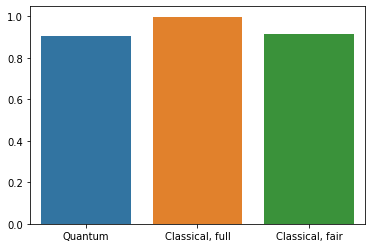

In [36]:
qnn_accuracy = qnn_results[1]
cnn_accuracy = cnn_results[1]
fair_nn_accuracy = fair_nn_results[1]

sns.barplot(["Quantum", "Classical, full", "Classical, fair"],
            [qnn_accuracy, cnn_accuracy, fair_nn_accuracy])